In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON PCA DATA")
print("="*70)

# ============================================================
# STEP 1: Load PCA-Reduced Data
# ============================================================
print("\n[Step 1] Loading PCA-reduced data...")
df_pca = pd.read_csv('Data/pca_dataset.csv')
print(f"✓ Loaded PCA data: {df_pca.shape}")
print(f"  Samples: {df_pca.shape[0]}")
print(f"  Features (Principal Components): {df_pca.shape[1]}")
print(df_pca.head())


C2C PROJECT - KMEANS CLUSTERING ON PCA DATA

[Step 1] Loading PCA-reduced data...
✓ Loaded PCA data: (9442, 15)
  Samples: 9442
  Features (Principal Components): 15
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.376799 -1.592803 -1.267176 -0.962705  0.118080  0.059719  0.418691   
1  0.142066 -1.490613  1.106300  1.124161  0.234284  0.578801  1.394527   
2  0.417423 -1.607544 -0.689641 -0.762268 -0.148614 -0.576068  0.265904   
3  0.521385 -1.724803 -0.448313 -0.786287 -0.776098 -0.217052 -0.155178   
4 -5.694743  2.437249 -0.859624  0.227490  0.507465 -0.860323  0.308745   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.939909  0.693531 -0.184363 -0.082870 -0.834715 -0.721033  0.476347   
1 -0.376332  0.587263 -0.351328 -0.666097  1.891433  0.353181  0.004293   
2  0.769184  1.052700 -0.938662  0.282397 -0.723400 -0.783167  0.192645   
3 -0.073299  0.249685 -0.801238 -0.022679  0.905133 -0.796509  0.608106   
4 -0.215

In [2]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 11)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_pca)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_pca, labels)
    davies_bouldin = davies_bouldin_score(df_pca, labels)
    calinski = calinski_harabasz_score(df_pca, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 192,849.71
  Silhouette Score: 0.3202 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.1046 (lower is better)
  Calinski-Harabasz Score: 2,885.79 (higher is better)

k=3:
  Inertia: 154,906.20
  Silhouette Score: 0.3378 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.2771 (lower is better)
  Calinski-Harabasz Score: 2,952.16 (higher is better)

k=4:
  Inertia: 143,465.80
  Silhouette Score: 0.1723 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.9783 (lower is better)
  Calinski-Harabasz Score: 2,375.70 (higher is better)

k=5:
  Inertia: 136,330.61
  Silhouette Score: 0.1585 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 2.0349 (lower is better)
  Calinski-Harabasz Score: 1,998.31 (higher is better)

k=6:
  Inertia: 130,459.43
  Silhouette Score: 0.1532 (hig

[Step 3] Visualizing clustering evaluation metrics...
✓ Saved: pca_clustering_evaluation.png


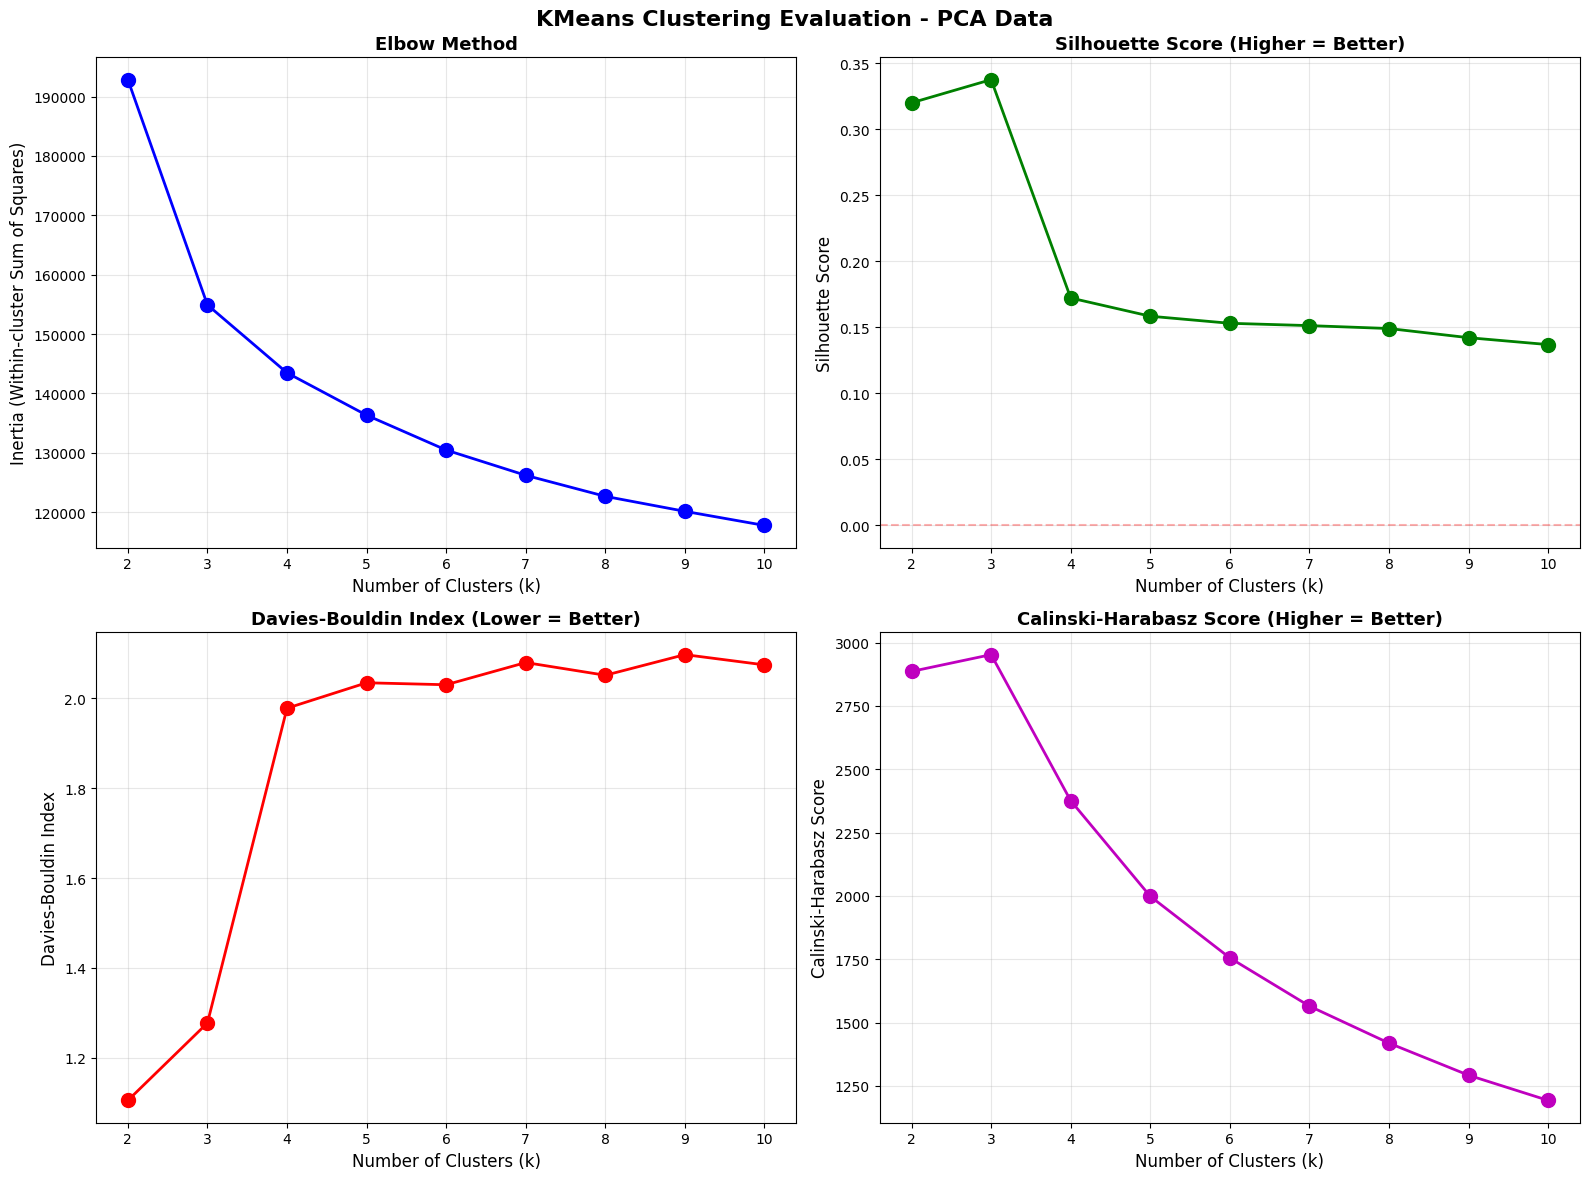

In [3]:


# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - PCA Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
print("✓ Saved: pca_clustering_evaluation.png")
plt.show()

In [4]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")

print("\n" + "="*70)
print("PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k")
print("="*70)


[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 3
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 3
Approximate elbow point: 4

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [5]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 4

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_pca)

# Add cluster labels to dataframe
df_pca['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_pca.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_pca.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_pca.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")




[Step 5] Applying KMeans with k=4...
----------------------------------------------------------------------
✓ Clustering complete with k=4

Final Clustering Metrics:
  Silhouette Score: 0.1723
  Davies-Bouldin Index: 1.9783
  Calinski-Harabasz Score: 2,375.70


In [6]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_pca['Cluster'].value_counts().sort_index()
cluster_percentages = (df_pca['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 10:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio > 5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")




[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 3,201 patients (33.90%)
  Cluster 1: 1,531 patients (16.21%)
  Cluster 2: 1,062 patients (11.25%)
  Cluster 3: 3,648 patients (38.64%)

Cluster Balance:
  Largest cluster: 3,648 patients
  Smallest cluster: 1,062 patients
  Imbalance ratio: 3.44x
  ✓ Clusters are reasonably balanced



[Step 7] Visualizing clusters...
✓ Saved: pca_clusters_3d.png


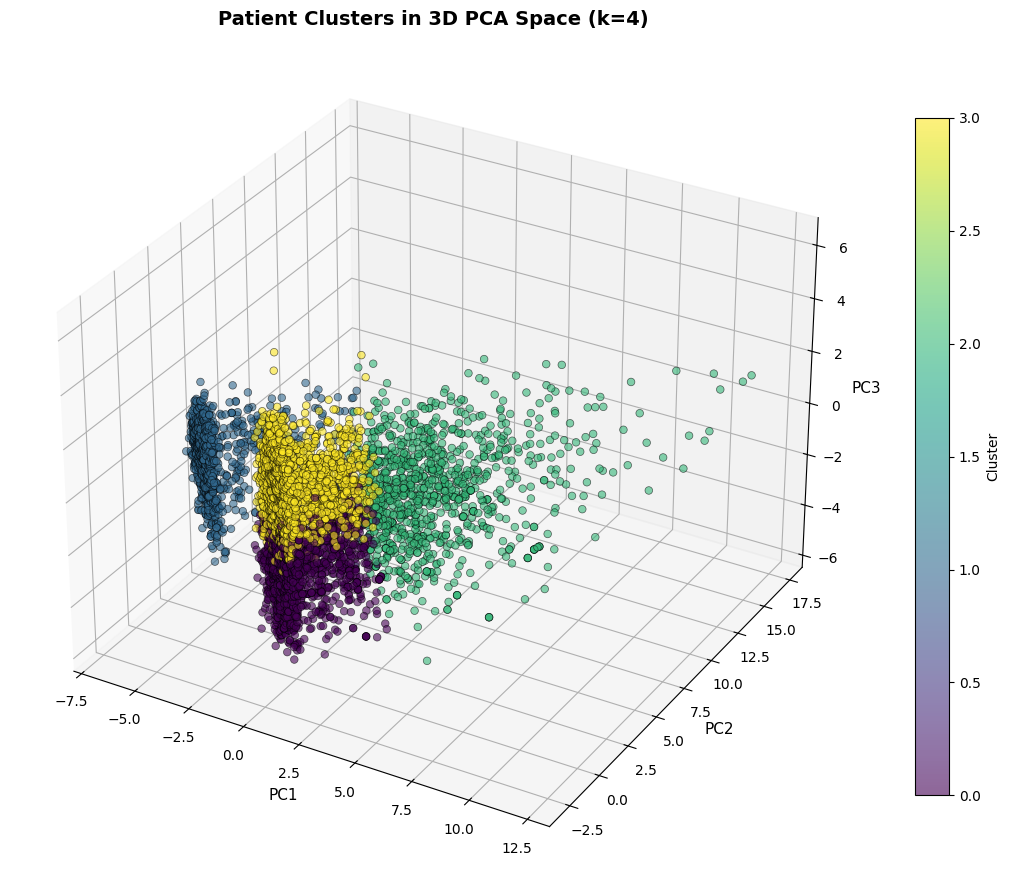

✓ Saved: pca_cluster_distribution.png


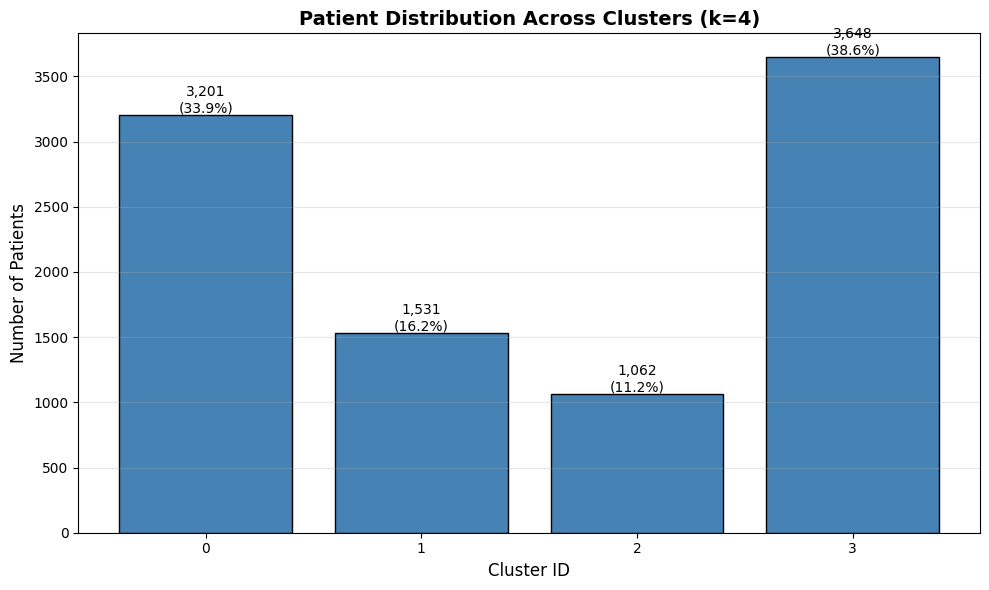

In [7]:
# ============================================================
# STEP 7: Visualize Clusters (3D + Distribution)
# ============================================================
print("\n[Step 7] Visualizing clusters...")

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    df_pca['PC3'],
    c=df_pca['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('PC1', fontsize=11)
ax.set_ylabel('PC2', fontsize=11)
ax.set_zlabel('PC3', fontsize=11)
ax.set_title(f'Patient Clusters in 3D PCA Space (k={optimal_k})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: pca_clusters_3d.png")
plt.show()

# Cluster size bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k), cluster_counts, color='steelblue', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Patient Distribution Across Clusters (k={optimal_k})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({cluster_percentages[i]:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("✓ Saved: pca_cluster_distribution.png")
plt.show()

### Now lets see if we can break the larger 2 clusters into smaller clusters again

In [12]:
# ============================================================
# CURRENT STATE: You have df_pca with 4 clusters (0, 1, 2, 3)
# ============================================================
print("\nCurrent cluster distribution:")
print(df_pca['Cluster'].value_counts().sort_index())
print(f"\nCluster sizes:")
for i in range(4):
    size = len(df_pca[df_pca['Cluster'] == i])
    pct = (size / len(df_pca)) * 100
    print(f"  Cluster {i}: {size:,} patients ({pct:.1f}%)")

# ============================================================
# STEP 1: Extract Large Clusters (0 and 3)
# ============================================================
print("\n" + "="*70)
print("EXTRACTING LARGE CLUSTERS FOR SUB-CLUSTERING")
print("="*70)

# Identify which clusters to split
cluster_0_data = df_pca[df_pca['Cluster'] == 0].copy()
cluster_3_data = df_pca[df_pca['Cluster'] == 3].copy()

print(f"\nCluster 0: {len(cluster_0_data):,} patients (will be split)")
print(f"Cluster 3: {len(cluster_3_data):,} patients (will be split)")

# Define sub-cluster range
sub_cluster_range = range(2, 5)  # Testing k=2, 3, 4


Current cluster distribution:
Cluster
0    3201
1    1531
2    1062
3    3648
Name: count, dtype: int64

Cluster sizes:
  Cluster 0: 3,201 patients (33.9%)
  Cluster 1: 1,531 patients (16.2%)
  Cluster 2: 1,062 patients (11.2%)
  Cluster 3: 3,648 patients (38.6%)

EXTRACTING LARGE CLUSTERS FOR SUB-CLUSTERING

Cluster 0: 3,201 patients (will be split)
Cluster 3: 3,648 patients (will be split)


In [13]:
# ============================================================
# STEP 2: Determine Optimal Sub-Clusters for Cluster 0
# ============================================================
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import numpy as np

print("\n" + "="*70)
print("ANALYZING CLUSTER 0 SUB-CLUSTERING")
print("="*70)

cluster_0_features = cluster_0_data.drop(columns=['Cluster'])

# ADD calinski_harabasz to metrics dictionary
metrics_c0 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'calinski_harabasz': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 0:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_0_features)
    
    sil = silhouette_score(cluster_0_features, labels)
    db = davies_bouldin_score(cluster_0_features, labels)
    ch = calinski_harabasz_score(cluster_0_features, labels)  # NEW: Add CH score
    inertia = kmeans.inertia_
    
    metrics_c0['k'].append(k)
    metrics_c0['silhouette'].append(sil)
    metrics_c0['davies_bouldin'].append(db)
    metrics_c0['calinski_harabasz'].append(ch)  # NEW: Store CH score
    metrics_c0['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Calinski-Harabasz: {ch:.2f} (higher is better)")  # NEW: Print CH score
    print(f"  Inertia: {inertia:,.2f}")
    print()

best_k_c0 = metrics_c0['k'][np.argmax(metrics_c0['silhouette'])]
print(f"✅ Recommended sub-clusters for Cluster 0: {best_k_c0}")

# NEW: Print CH score for the best k
best_ch_c0 = metrics_c0['calinski_harabasz'][np.argmax(metrics_c0['silhouette'])]
print(f"   CH Score at best k={best_k_c0}: {best_ch_c0:.2f}")


ANALYZING CLUSTER 0 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 0:

k=2:
  Silhouette: 0.1181 (higher is better)
  Davies-Bouldin: 2.8884 (lower is better)
  Calinski-Harabasz: 344.54 (higher is better)
  Inertia: 44,831.12

k=3:
  Silhouette: 0.0969 (higher is better)
  Davies-Bouldin: 2.6606 (lower is better)
  Calinski-Harabasz: 288.82 (higher is better)
  Inertia: 42,062.17

k=4:
  Silhouette: 0.0859 (higher is better)
  Davies-Bouldin: 2.5773 (lower is better)
  Calinski-Harabasz: 261.72 (higher is better)
  Inertia: 39,868.14

✅ Recommended sub-clusters for Cluster 0: 2
   CH Score at best k=2: 344.54


In [14]:
# ============================================================
# STEP 3: Determine Optimal Sub-Clusters for Cluster 3
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 3 SUB-CLUSTERING")
print("="*70)

cluster_3_features = cluster_3_data.drop(columns=['Cluster'])

# ADD calinski_harabasz to metrics dictionary
metrics_c3 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'calinski_harabasz': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 3:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_3_features)
    
    sil = silhouette_score(cluster_3_features, labels)
    db = davies_bouldin_score(cluster_3_features, labels)
    ch = calinski_harabasz_score(cluster_3_features, labels)  # NEW: Add CH score
    inertia = kmeans.inertia_
    
    metrics_c3['k'].append(k)
    metrics_c3['silhouette'].append(sil)
    metrics_c3['davies_bouldin'].append(db)
    metrics_c3['calinski_harabasz'].append(ch)  # NEW: Store CH score
    metrics_c3['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Calinski-Harabasz: {ch:.2f} (higher is better)")  # NEW: Print CH score
    print(f"  Inertia: {inertia:,.2f}")
    print()

best_k_c3 = metrics_c3['k'][np.argmax(metrics_c3['silhouette'])]
print(f"✅ Recommended sub-clusters for Cluster 3: {best_k_c3}")

# NEW: Print CH score for the best k
best_ch_c3 = metrics_c3['calinski_harabasz'][np.argmax(metrics_c3['silhouette'])]
print(f"   CH Score at best k={best_k_c3}: {best_ch_c3:.2f}")


ANALYZING CLUSTER 3 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 3:

k=2:
  Silhouette: 0.1097 (higher is better)
  Davies-Bouldin: 2.6713 (lower is better)
  Calinski-Harabasz: 463.74 (higher is better)
  Inertia: 44,308.92

k=3:
  Silhouette: 0.0843 (higher is better)
  Davies-Bouldin: 2.6409 (lower is better)
  Calinski-Harabasz: 377.37 (higher is better)
  Inertia: 41,377.03

k=4:
  Silhouette: 0.0762 (higher is better)
  Davies-Bouldin: 2.6587 (lower is better)
  Calinski-Harabasz: 318.71 (higher is better)
  Inertia: 39,563.83

✅ Recommended sub-clusters for Cluster 3: 2
   CH Score at best k=2: 463.74



VISUALIZING SUB-CLUSTERING ANALYSIS

✓ Visualization complete


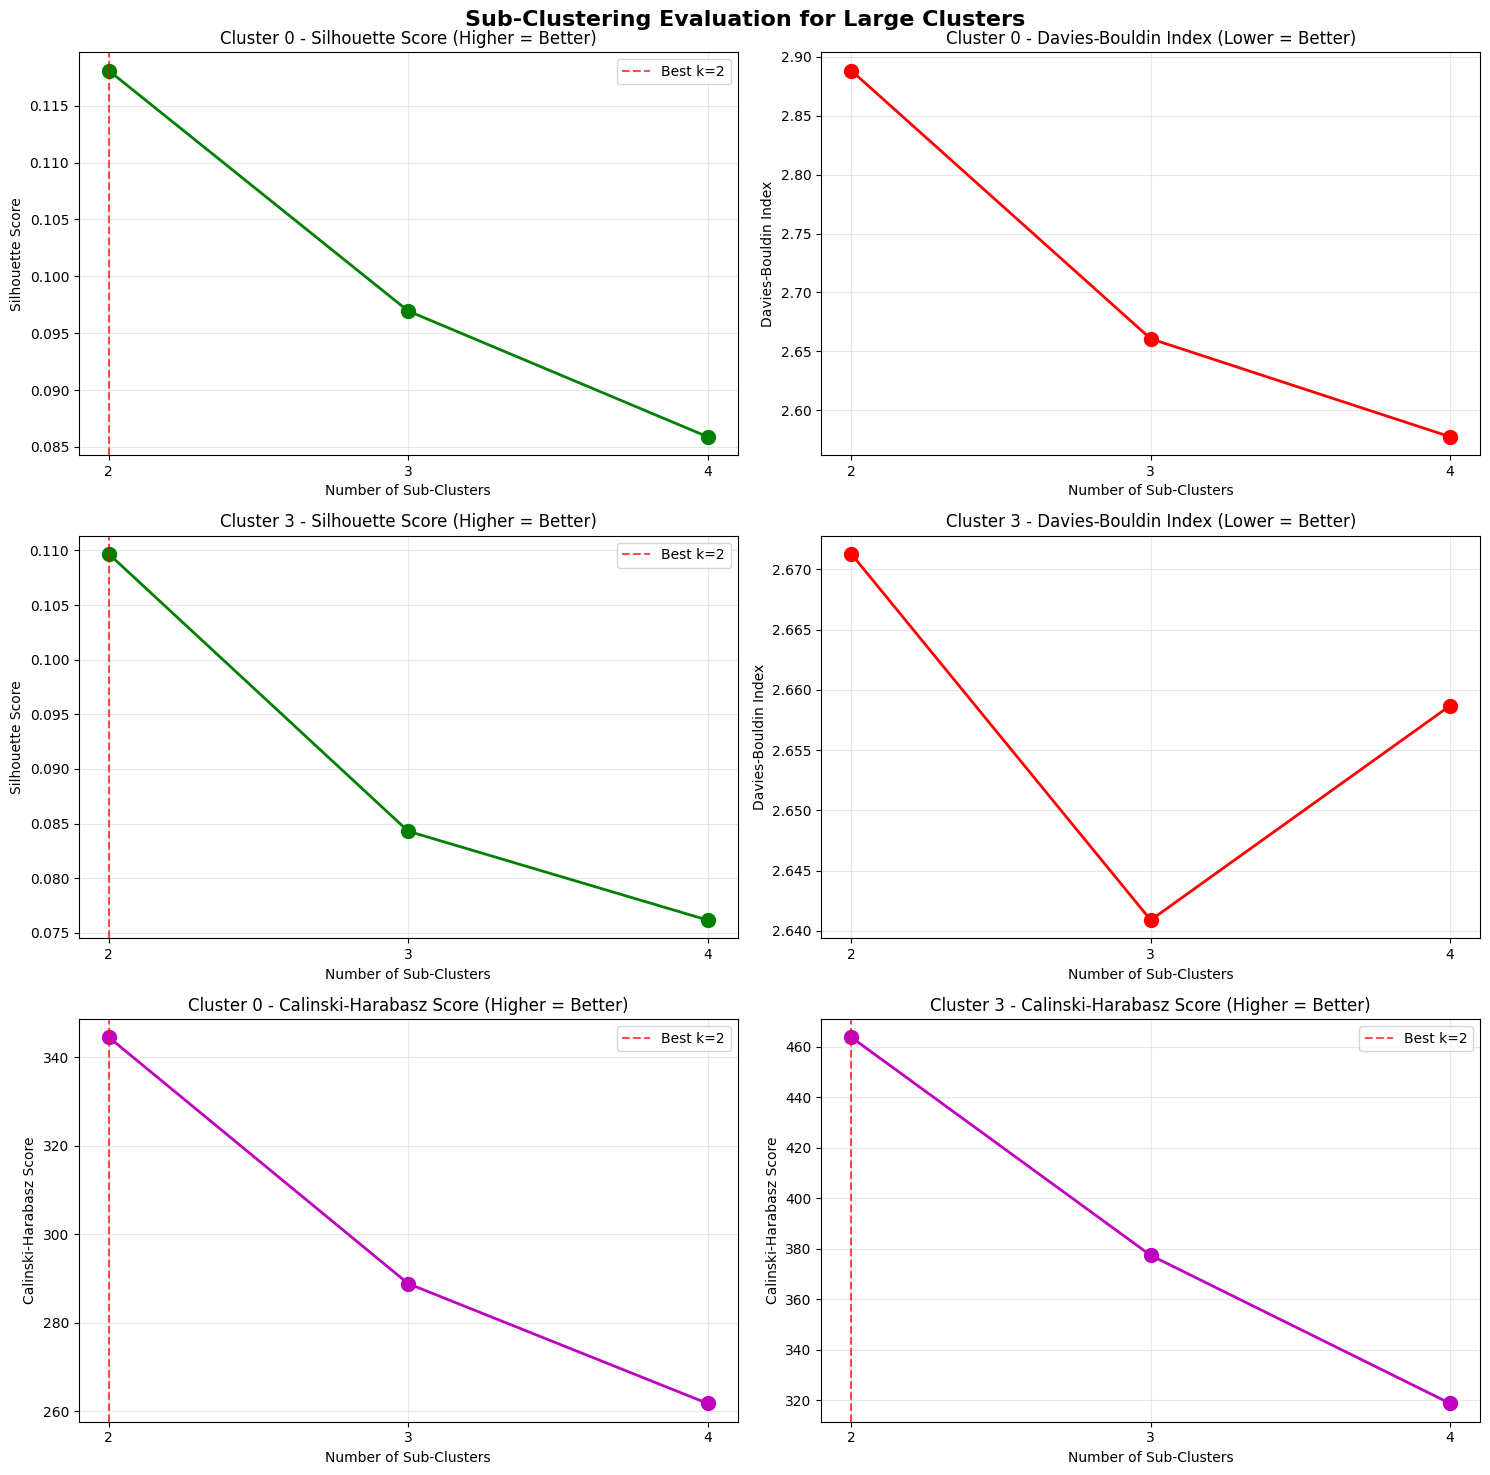


📊 SUMMARY:
Cluster 0 (k=2):
   Silhouette: 0.1181
   Davies-Bouldin: 2.8884
   Calinski-Harabasz: 344.54

Cluster 3 (k=2):
   Silhouette: 0.1097
   Davies-Bouldin: 2.6713
   Calinski-Harabasz: 463.74


In [15]:
# ============================================================
# STEP 4: Visualize Sub-Clustering Metrics (WITH CH SCORE)
# ============================================================
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("VISUALIZING SUB-CLUSTERING ANALYSIS")
print("="*70)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Sub-Clustering Evaluation for Large Clusters', fontsize=16, fontweight='bold')

# Cluster 0 - Silhouette
axes[0, 0].plot(metrics_c0['k'], metrics_c0['silhouette'], 'go-', linewidth=2, markersize=10)
axes[0, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[0, 0].set_xlabel('Number of Sub-Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Cluster 0 - Silhouette Score (Higher = Better)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics_c0['k'])
axes[0, 0].legend()

# Cluster 0 - Davies-Bouldin
axes[0, 1].plot(metrics_c0['k'], metrics_c0['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Sub-Clusters')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Cluster 0 - Davies-Bouldin Index (Lower = Better)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics_c0['k'])

# Cluster 3 - Silhouette
axes[1, 0].plot(metrics_c3['k'], metrics_c3['silhouette'], 'go-', linewidth=2, markersize=10)
axes[1, 0].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[1, 0].set_xlabel('Number of Sub-Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Cluster 3 - Silhouette Score (Higher = Better)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics_c3['k'])
axes[1, 0].legend()

# Cluster 3 - Davies-Bouldin
axes[1, 1].plot(metrics_c3['k'], metrics_c3['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Sub-Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Cluster 3 - Davies-Bouldin Index (Lower = Better)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics_c3['k'])

# ============================================================
# NEW: Calinski-Harabasz Score Plots
# ============================================================

# Cluster 0 - CH Score
axes[2, 0].plot(metrics_c0['k'], metrics_c0['calinski_harabasz'], 'mo-', linewidth=2, markersize=10)
axes[2, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[2, 0].set_xlabel('Number of Sub-Clusters')
axes[2, 0].set_ylabel('Calinski-Harabasz Score')
axes[2, 0].set_title('Cluster 0 - Calinski-Harabasz Score (Higher = Better)')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xticks(metrics_c0['k'])
axes[2, 0].legend()

# Cluster 3 - CH Score
axes[2, 1].plot(metrics_c3['k'], metrics_c3['calinski_harabasz'], 'mo-', linewidth=2, markersize=10)
axes[2, 1].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[2, 1].set_xlabel('Number of Sub-Clusters')
axes[2, 1].set_ylabel('Calinski-Harabasz Score')
axes[2, 1].set_title('Cluster 3 - Calinski-Harabasz Score (Higher = Better)')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xticks(metrics_c3['k'])
axes[2, 1].legend()

plt.tight_layout()
print("\n✓ Visualization complete")
plt.show()

# Print summary with CH scores
print(f"\n📊 SUMMARY:")
print(f"Cluster 0 (k={best_k_c0}):")
print(f"   Silhouette: {metrics_c0['silhouette'][best_k_c0-2]:.4f}")
print(f"   Davies-Bouldin: {metrics_c0['davies_bouldin'][best_k_c0-2]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c0['calinski_harabasz'][best_k_c0-2]:.2f}")
print(f"\nCluster 3 (k={best_k_c3}):")
print(f"   Silhouette: {metrics_c3['silhouette'][best_k_c3-2]:.4f}")
print(f"   Davies-Bouldin: {metrics_c3['davies_bouldin'][best_k_c3-2]:.4f}")
print(f"   Calinski-Harabasz: {metrics_c3['calinski_harabasz'][best_k_c3-2]:.2f}")

In [ ]:
# ============================================================
# STEP 5: User Input for Sub-Cluster Sizes
# ============================================================
print("\n" + "="*70)
print("CHOOSE SUB-CLUSTER CONFIGURATIONS")
print("="*70)

print(f"\nRecommended for Cluster 0: {best_k_c2} sub-clusters")
print(f"Recommended for Cluster 3: {best_k_c3} sub-clusters")

# Get user input
k_split_c0 = 3  # From the visuals above
k_split_c3 = 3  # From the visuals above

# ============================================================
# STEP 6: Apply Sub-Clustering
# ============================================================
print("\n" + "="*70)
print("APPLYING SUB-CLUSTERING")
print("="*70)

# Sub-cluster Cluster 0
print(f"\nSub-clustering Cluster 0 into {k_split_c0} groups...")
kmeans_c0 = KMeans(n_clusters=k_split_c0, random_state=42, n_init=50)
sub_labels_c0 = kmeans_c0.fit_predict(cluster_2_features)

# Sub-cluster Cluster 3
print(f"Sub-clustering Cluster 3 into {k_split_c3} groups...")
kmeans_c3 = KMeans(n_clusters=k_split_c3, random_state=42, n_init=50)
sub_labels_c3 = kmeans_c3.fit_predict(cluster_3_features)

# ============================================================
# STEP 7: Create New Cluster Labels
# ============================================================
print("\n" + "="*70)
print("CREATING REFINED CLUSTER STRUCTURE")
print("="*70)

# Create a copy for the refined clustering
df_pca_refined = df_pca.copy()

# Relabel clusters:
# - Cluster 0 splits into: 0, 1, 2, ... (depending on k_split_c0)
# - Cluster 1 stays as original + k_split_c0 - 1
# - Cluster 2 stays as original + k_split_c0 - 1
# - Cluster 3 splits into: next available numbers after Cluster 2

new_cluster_mapping = {}
next_cluster_id = 0  # Start from 0

# Map Cluster 0's sub-clusters
for sub_id in range(k_split_c0):
    new_cluster_mapping[f'0_{sub_id}'] = next_cluster_id
    next_cluster_id += 1

# Cluster 1 gets next available ID
cluster_1_new_id = next_cluster_id
next_cluster_id += 1

# Cluster 2 gets next available ID
cluster_2_new_id = next_cluster_id
next_cluster_id += 1

# Map Cluster 3's sub-clusters
for sub_id in range(k_split_c3):
    new_cluster_mapping[f'3_{sub_id}'] = next_cluster_id
    next_cluster_id += 1

# Apply new labels
df_pca_refined['Cluster_Original'] = df_pca_refined['Cluster'].copy()
df_pca_refined['Cluster_Refined'] = df_pca_refined['Cluster'].copy()

# Update Cluster 0
for idx, sub_label in zip(cluster_2_data.index, sub_labels_c0):
    df_pca_refined.loc[idx, 'Cluster_Refined'] = new_cluster_mapping[f'0_{sub_label}']

# Update Cluster 1
df_pca_refined.loc[df_pca_refined['Cluster_Original'] == 1, 'Cluster_Refined'] = cluster_1_new_id

# Update Cluster 2
df_pca_refined.loc[df_pca_refined['Cluster_Original'] == 2, 'Cluster_Refined'] = cluster_2_new_id

# Update Cluster 3
for idx, sub_label in zip(cluster_3_data.index, sub_labels_c3):
    df_pca_refined.loc[idx, 'Cluster_Refined'] = new_cluster_mapping[f'3_{sub_label}']

# Make Cluster_Refined the main cluster column
df_pca_refined['Cluster'] = df_pca_refined['Cluster_Refined']

print("\nOriginal clustering:")
print(df_pca['Cluster'].value_counts().sort_index())

print("\nRefined clustering:")
print(df_pca_refined['Cluster'].value_counts().sort_index())

total_clusters = len(df_pca_refined['Cluster'].unique())
print(f"\nTotal clusters after refinement: {total_clusters}")


CHOOSE SUB-CLUSTER CONFIGURATIONS

Recommended for Cluster 0: 2 sub-clusters
Recommended for Cluster 3: 2 sub-clusters

APPLYING SUB-CLUSTERING

Sub-clustering Cluster 0 into 3 groups...
Sub-clustering Cluster 3 into 3 groups...

CREATING REFINED CLUSTER STRUCTURE

Original clustering:
Cluster
0    3201
1    1531
2    1062
3    3648
Name: count, dtype: int64

Refined clustering:
Cluster
0     860
1    1572
2     769
3    1531
4    1062
5    1087
6    1099
7    1462
Name: count, dtype: int64

Total clusters after refinement: 8



VISUALIZING REFINED CLUSTERS
✓ Saved: pca_refined_clusters_3d.png


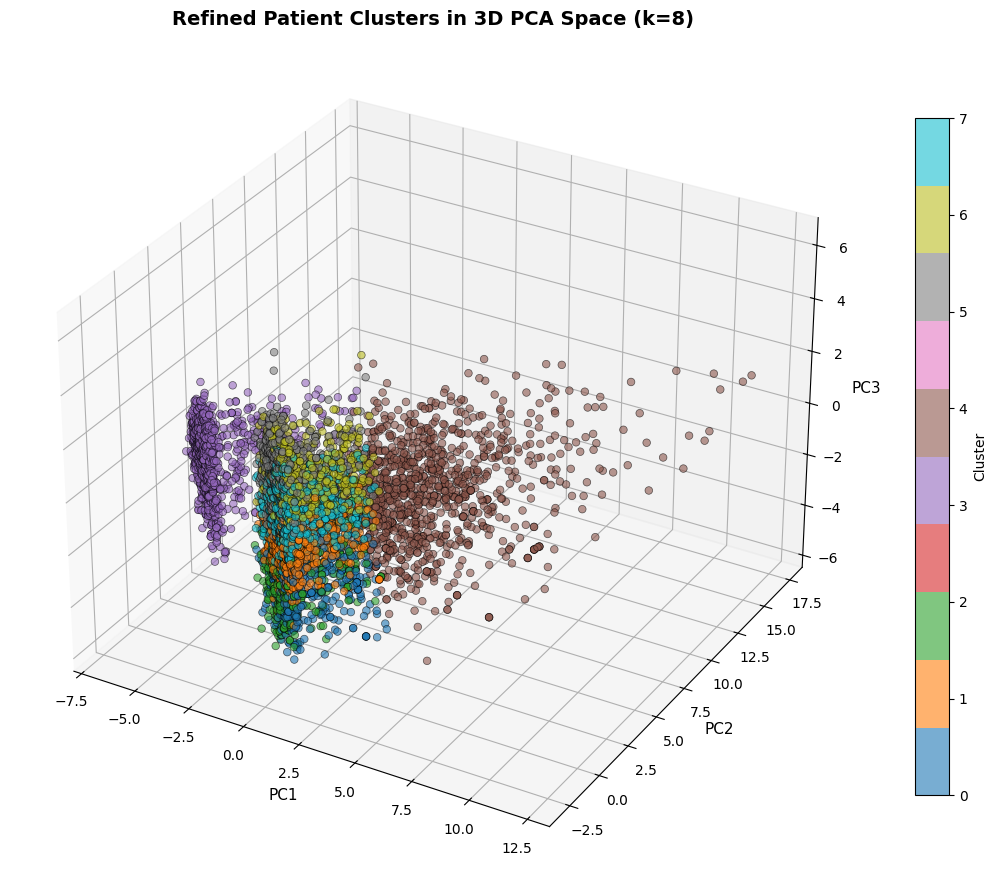

✓ Saved: pca_refined_cluster_distribution.png


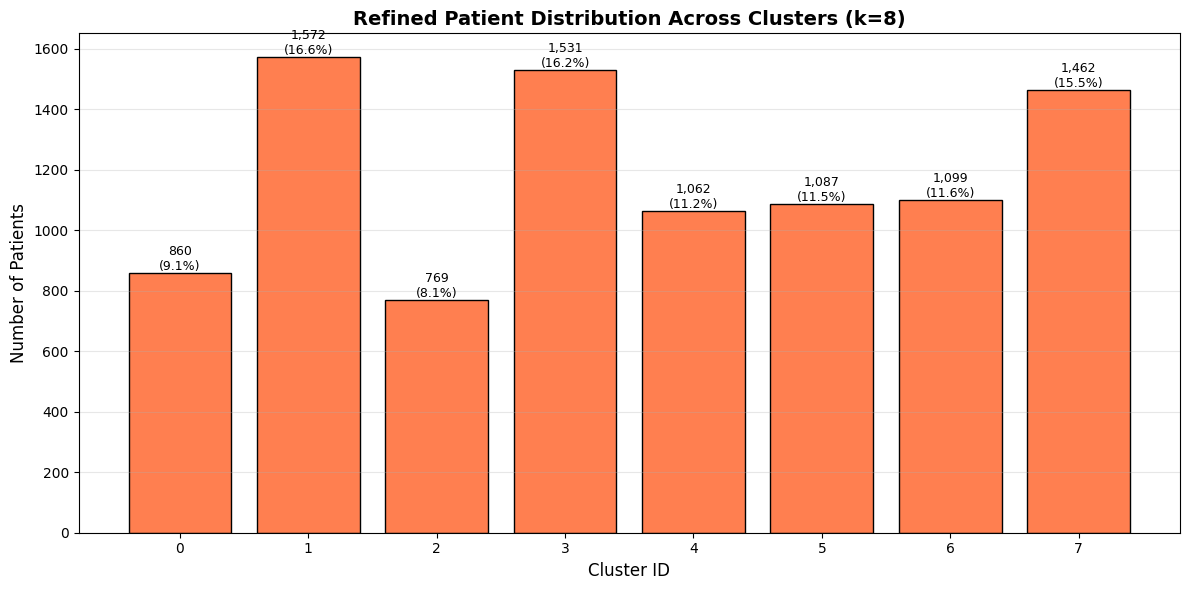

✓ Saved: pca_clustering_comparison.png


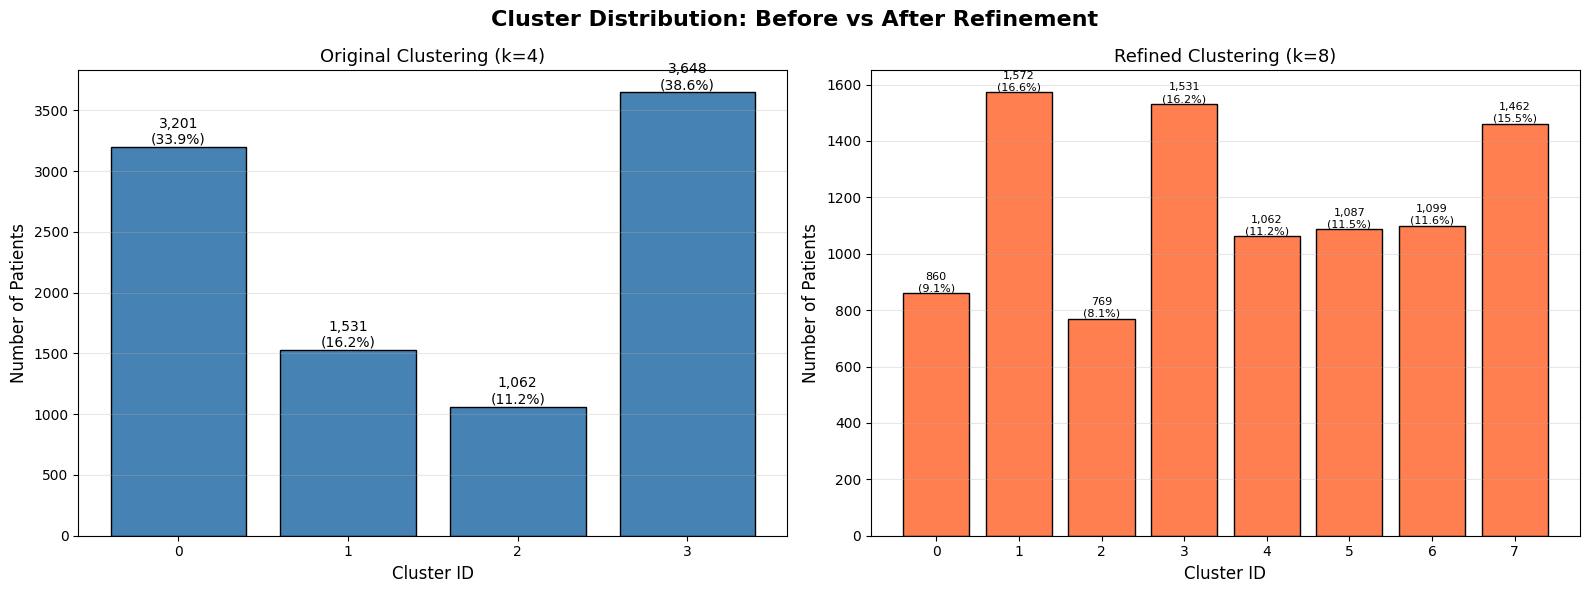


FINAL CLUSTERING METRICS

Refined Clustering Quality:
  Silhouette Score: 0.1343
  Davies-Bouldin Index: 2.2795
  Calinski-Harabasz Score: 1,318.12

Cluster Summary:
  Cluster 0: 860 patients (9.1%)
  Cluster 1: 1,572 patients (16.6%)
  Cluster 2: 769 patients (8.1%)
  Cluster 3: 1,531 patients (16.2%)
  Cluster 4: 1,062 patients (11.2%)
  Cluster 5: 1,087 patients (11.5%)
  Cluster 6: 1,099 patients (11.6%)
  Cluster 7: 1,462 patients (15.5%)


In [ ]:
# ============================================================
# STEP 8: Visualize Refined Clusters
# ============================================================
print("\n" + "="*70)
print("VISUALIZING REFINED CLUSTERS")
print("="*70)

# 3D visualization with refined clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_refined['PC1'],
    df_pca_refined['PC2'],
    df_pca_refined['PC3'],
    c=df_pca_refined['Cluster'],
    cmap='tab10',  # Better for more clusters
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('PC1', fontsize=11)
ax.set_ylabel('PC2', fontsize=11)
ax.set_zlabel('PC3', fontsize=11)
ax.set_title(f'Refined Patient Clusters in 3D PCA Space (k={total_clusters})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: pca_refined_clusters_3d.png")
plt.show()

# Refined cluster distribution
cluster_counts_refined = df_pca_refined['Cluster'].value_counts().sort_index()
cluster_percentages_refined = (df_pca_refined['Cluster'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(range(total_clusters), cluster_counts_refined, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Refined Patient Distribution Across Clusters (k={total_clusters})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(total_clusters))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, cluster_id) in enumerate(zip(bars, cluster_counts_refined.index)):
    height = bar.get_height()
    count = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("✓ Saved: pca_refined_cluster_distribution.png")
plt.show()

# Comparison: Before vs After
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Cluster Distribution: Before vs After Refinement', fontsize=16, fontweight='bold')

# Before
original_counts = df_pca['Cluster'].value_counts().sort_index()
original_pcts = (original_counts / len(df_pca) * 100)
axes[0].bar(range(len(original_counts)), original_counts, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Original Clustering (k=4)', fontsize=13)
axes[0].set_xticks(range(len(original_counts)))
axes[0].grid(True, alpha=0.3, axis='y')
for i, (count, pct) in enumerate(zip(original_counts, original_pcts)):
    axes[0].text(i, count, f'{int(count):,}\n({pct:.1f}%)', ha='center', va='bottom')

# After
axes[1].bar(range(len(cluster_counts_refined)), cluster_counts_refined, color='coral', edgecolor='black')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].set_title(f'Refined Clustering (k={total_clusters})', fontsize=13)
axes[1].set_xticks(range(len(cluster_counts_refined)))
axes[1].grid(True, alpha=0.3, axis='y')
for i, cluster_id in enumerate(cluster_counts_refined.index):
    count = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    axes[1].text(i, count, f'{int(count):,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
print("✓ Saved: pca_clustering_comparison.png")
plt.show()

# ============================================================
# STEP 9: Calculate Final Metrics
# ============================================================
print("\n" + "="*70)
print("FINAL CLUSTERING METRICS")
print("="*70)

# Calculate metrics on refined clustering
cluster_features = df_pca_refined.drop(columns=['Cluster', 'Cluster_Original', 'Cluster_Refined'])
final_silhouette = silhouette_score(cluster_features, df_pca_refined['Cluster'])
final_db = davies_bouldin_score(cluster_features, df_pca_refined['Cluster'])
final_ch = calinski_harabasz_score(cluster_features, df_pca_refined['Cluster'])

print(f"\nRefined Clustering Quality:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")

print(f"\nCluster Summary:")
for cluster_id in sorted(df_pca_refined['Cluster'].unique()):
    count = len(df_pca_refined[df_pca_refined['Cluster'] == cluster_id])
    pct = (count / len(df_pca_refined)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

In [14]:
import joblib
import os

# Create Models folder if it doesn't exist
os.makedirs('Models', exist_ok=True)

# Save the three KMeans models
joblib.dump(kmeans_final, 'Models/kmeans_initial.pkl')
joblib.dump(kmeans_c0, 'Models/kmeans_cluster0_split.pkl')
joblib.dump(kmeans_c3, 'Models/kmeans_cluster3_split.pkl')

print("✓ All clustering models saved to Models/ folder")

✓ All clustering models saved to Models/ folder


### Get the clusters and attach it to the original dataset

In [15]:
import pandas as pd

print("="*70)
print("APPENDING CLUSTER LABELS TO ORIGINAL DATASET")
print("="*70)

# ============================================================
# STEP 1: Load Original Dataset
# ============================================================
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/train_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


APPENDING CLUSTER LABELS TO ORIGINAL DATASET

[Step 1] Loading original dataset...
✓ Original dataset loaded: (9442, 46)


In [16]:
# ============================================================
# STEP 2: Extract Cluster Labels from Existing DataFrames
# ============================================================
print("\n[Step 2] Extracting cluster labels from dataframes...")

# You already have df_pca_refined and df_umap_refined in memory
# Extract the cluster columns
pca_clusters = df_pca_refined['Cluster'].values

print(f"✓ PCA clusters extracted: {len(pca_clusters)} labels")
print(f"  Unique PCA clusters: {sorted(df_pca_refined['Cluster'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ PCA clusters extracted: 9442 labels
  Unique PCA clusters: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7)]


In [17]:
df_pca.shape

(9442, 16)

In [18]:
# ============================================================
# STEP 3: Verify Alignment
# ============================================================
print("\n[Step 3] Verifying data alignment...")

if len(df_original) == len(pca_clusters):
    print(f"✓ All datasets aligned: {len(df_original)} rows")
else:
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"  Original dataset: {len(df_original)} rows")
    print(f"  PCA clusters: {len(pca_clusters)} rows")
    print("\n❌ Cannot proceed - datasets must have same number of rows")
    raise ValueError("Dataset size mismatch")


[Step 3] Verifying data alignment...
✓ All datasets aligned: 9442 rows


In [19]:
# ============================================================
# STEP 4: Append Cluster Labels
# ============================================================
print("\n[Step 4] Appending cluster labels to original dataset...")

# Create a copy
df_with_clusters = df_original.copy()

# Add cluster columns
df_with_clusters['pca_clusters'] = pca_clusters

print(f"✓ Added 'pca_clusters' column")



[Step 4] Appending cluster labels to original dataset...
✓ Added 'pca_clusters' column


In [20]:
# ============================================================
# STEP 5: Verify Results
# ============================================================
print("\n[Step 5] Verifying results...")

print(f"\nDataset shape: {df_with_clusters.shape}")
print(f"Columns added: {list(df_with_clusters.columns[-2:])}")

# Show distribution
print(f"\nPCA Cluster Distribution:")
pca_dist = df_with_clusters['pca_clusters'].value_counts().sort_index()
for cluster_id, count in pca_dist.items():
    pct = (count / len(df_with_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

# Check for missing values
print(f"\nMissing values check:")
print(f"  pca_clusters: {df_with_clusters['pca_clusters'].isna().sum()}")

# Show sample
print(f"\nSample of data with clusters (first 10 rows):")
print(df_with_clusters[['pca_clusters']].head(10))


[Step 5] Verifying results...

Dataset shape: (9442, 47)
Columns added: ['Age_Group', 'pca_clusters']

PCA Cluster Distribution:
  Cluster 0: 860 patients (9.1%)
  Cluster 1: 1,572 patients (16.6%)
  Cluster 2: 769 patients (8.1%)
  Cluster 3: 1,531 patients (16.2%)
  Cluster 4: 1,062 patients (11.2%)
  Cluster 5: 1,087 patients (11.5%)
  Cluster 6: 1,099 patients (11.6%)
  Cluster 7: 1,462 patients (15.5%)

Missing values check:
  pca_clusters: 0

Sample of data with clusters (first 10 rows):
   pca_clusters
0             1
1             7
2             1
3             1
4             3
5             3
6             7
7             3
8             0
9             6


In [21]:
df_with_clusters.head()

,General_hearing_condition,Had_high_blood_pressure,WBC,Haemoglobin,Platelete,Gender,Age,Race_Ethnicity,Country_of_Birth,Education_Level,...,Pulse,BODY_MEASURE_COMPOSITE,blood_macros,mean_steroid_ng_dl,balance_symptom_score,balance_impact_score,fall_risk_score,functional_difficulty_composite,Age_Group,pca_clusters
0,Good,Yes,6.5,14.0,241.0,Female,71.0,Non-Hispanic White,Born in 50 US states or Washington,High school graduate/GED or equivalent,...,69.333333,0.249125,-0.012353,-0.274090,0,0.0,0.0,Some difficulty,61-75,1
1,Good,No,6.8,13.9,264.5,Male,32.0,Mexican American,Unknown/NA,High school graduate/GED or equivalent,...,72.000000,0.318792,-0.049170,0.216401,0,0.0,0.0,No difficulty,31-45,7
2,Good,Yes,6.5,14.0,241.0,Female,65.0,Non-Hispanic Black,Born in 50 US states or Washington,High school graduate/GED or equivalent,...,69.333333,0.475114,-0.012353,-0.274090,0,0.0,0.0,Some difficulty,61-75,1
3,A little trouble,Yes,6.5,14.0,241.0,Male,74.0,Non-Hispanic White,Born in 50 US states or Washington,Some college or AA degree,...,69.333333,0.249125,-0.012353,-0.274090,0,0.0,0.0,Some difficulty,61-75,1
4,Good,Unknown/NA,9.3,12.9,439.0,Male,8.0,Other Race - Including Multi-Racial,Born in 50 US states or Washington,Unknown/NA,...,71.666667,-1.817027,-0.148207,-0.680624,0,0.0,0.0,Some difficulty,0-18,3


### EDA on the clusters!

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS


In [26]:
# ============================================================
# STEP 1: Load Data
# ============================================================
print("\n[Step 1] Loading enhanced dataset...")

df = df_with_clusters.copy()
print(f"✓ Dataset loaded: {df.shape}")
print(f"  Total patients: {len(df):,}")
print(f"  Features: {df.shape[1]}")

# Drop Unnamed: 0 if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')
    
print(f"✓ Final shape: {df.shape}")


[Step 1] Loading enhanced dataset...
✓ Dataset loaded: (9442, 47)
  Total patients: 9,442
  Features: 47
✓ Final shape: (9442, 47)


In [27]:
# ============================================================
# STEP 2: Define Feature Categories
# ============================================================
print("\n[Step 2] Categorizing features...")

# Demographic features
demographic_features = ['Gender', 'Age', 'Age_Group', 'Race_Ethnicity', 
                       'Country_of_Birth', 'Education_Level', 'Marital_Status']

# Socioeconomic features
socioeconomic_features = ['Income_to_Poverty_Ratio', 'Family_poverty_level_index',
                         'Household_Size', 'Covered_by_health_insurance', 
                         'Education_Level']

# Health conditions (Yes/No type)
health_conditions = [
    'Has_diabetes', 'Has_Disability', 'Has_Hepatitis', 'Has_Kidney_Failure',
    'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer', 'Had_high_blood_pressure'
]

# Clinical measurements (continuous numeric)
clinical_measurements = [
    'WBC', 'Haemoglobin', 'Platelete', 'HDL_mg', 'Cholestrol_level',
    'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE'
]

# Lifestyle/behavioral
lifestyle_features = [
    'Takes_vitamin_supplements', 
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Number_of_hours_of_sleep'
]

# Health status (categorical)
health_status = [
    'General_health_condition', 'General_hearing_condition',
    'Teeth_and_gum_health', 'Tested_for_HIV_Virus',
    'Received_Hepatitis_A_Vaccine'
]

# Composite scores
composite_scores = [
    'blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
    'balance_impact_score', 'fall_risk_score', 'functional_difficulty_composite'
]

print(f"✓ Feature categories defined")
print(f"  Demographics: {len(demographic_features)}")
print(f"  Socioeconomic: {len(socioeconomic_features)}")
print(f"  Health Conditions: {len(health_conditions)}")
print(f"  Clinical Measurements: {len(clinical_measurements)}")
print(f"  Lifestyle: {len(lifestyle_features)}")
print(f"  Composite Scores: {len(composite_scores)}")


[Step 2] Categorizing features...
✓ Feature categories defined
  Demographics: 7
  Socioeconomic: 5
  Health Conditions: 11
  Clinical Measurements: 9
  Lifestyle: 4
  Composite Scores: 6


In [28]:
# ============================================================
# STEP 3: Basic Cluster Overview
# ============================================================
print("\n" + "="*70)
print("CLUSTER OVERVIEW - PCA CLUSTERS")
print("="*70)

n_clusters_pca = df['pca_clusters'].nunique()
print(f"\nTotal PCA clusters: {n_clusters_pca}")
print(f"\nCluster distribution:")

for cluster_id in sorted(df['pca_clusters'].unique()):
    count = len(df[df['pca_clusters'] == cluster_id])
    pct = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


CLUSTER OVERVIEW - PCA CLUSTERS

Total PCA clusters: 8

Cluster distribution:
  Cluster 0: 860 patients (9.1%)
  Cluster 1: 1,572 patients (16.6%)
  Cluster 2: 769 patients (8.1%)
  Cluster 3: 1,531 patients (16.2%)
  Cluster 4: 1,062 patients (11.2%)
  Cluster 5: 1,087 patients (11.5%)
  Cluster 6: 1,099 patients (11.6%)
  Cluster 7: 1,462 patients (15.5%)


In [29]:
# ============================================================
# STEP 4: Cluster Profiling - Demographics
# ============================================================
print("\n" + "="*70)
print("DEMOGRAPHIC PROFILE BY CLUSTER")
print("="*70)

demographic_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - DEMOGRAPHICS")
    print(f"{'='*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    cluster_demo = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    # Age
    mean_age = cluster_data['Age'].mean()
    median_age = cluster_data['Age'].median()
    cluster_demo['Mean_Age'] = mean_age
    cluster_demo['Median_Age'] = median_age
    print(f"\nAge:")
    print(f"  Mean: {mean_age:.1f} years")
    print(f"  Median: {median_age:.1f} years")
    print(f"  Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f} years")
    
    # Age Group
    print(f"\nAge Group Distribution:")
    age_group_dist = cluster_data['Age_Group'].value_counts()
    for age_group, count in age_group_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {age_group}: {count:,} ({pct:.1f}%)")
    
    # Gender
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_dist.get('Female', 0) / len(cluster_data)) * 100
    cluster_demo['Male_%'] = male_pct
    cluster_demo['Female_%'] = female_pct
    print(f"  Male: {gender_dist.get('Male', 0):,} ({male_pct:.1f}%)")
    print(f"  Female: {gender_dist.get('Female', 0):,} ({female_pct:.1f}%)")
    
    # Race/Ethnicity
    print(f"\nRace/Ethnicity (Top 3):")
    race_dist = cluster_data['Race_Ethnicity'].value_counts().head(3)
    for race, count in race_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {race}: {count:,} ({pct:.1f}%)")
    
    # Education
    print(f"\nEducation Level (Top 3):")
    edu_dist = cluster_data['Education_Level'].value_counts().head(3)
    for edu, count in edu_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {edu}: {count:,} ({pct:.1f}%)")
    
    # Marital Status
    print(f"\nMarital Status (Top 2):")
    marital_dist = cluster_data['Marital_Status'].value_counts().head(2)
    for status, count in marital_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    demographic_summary.append(cluster_demo)

demographic_summary_df = pd.DataFrame(demographic_summary)
print("\n✓ Demographic summary created")


DEMOGRAPHIC PROFILE BY CLUSTER

CLUSTER 0 - DEMOGRAPHICS
Size: 860 patients (9.1%)

Age:
  Mean: 52.4 years
  Median: 56.0 years
  Range: 18 - 80 years

Age Group Distribution:
  61-75: 313 (36.4%)
  46-60: 308 (35.8%)
  31-45: 178 (20.7%)

Gender Distribution:
  Male: 332 (38.6%)
  Female: 528 (61.4%)

Race/Ethnicity (Top 3):
  Non-Hispanic White: 423 (49.2%)
  Other Hispanic: 137 (15.9%)
  Non-Hispanic Black: 126 (14.7%)

Education Level (Top 3):
  Some college or AA degree: 275 (32.0%)
  High school graduate/GED or equivalent: 206 (24.0%)
  Less than 9th grade: 167 (19.4%)

Marital Status (Top 2):
  Married/Living with partner: 380 (44.2%)
  Widowed/Divorced/Separated: 293 (34.1%)

CLUSTER 1 - DEMOGRAPHICS
Size: 1,572 patients (16.6%)

Age:
  Mean: 66.0 years
  Median: 68.0 years
  Range: 18 - 80 years

Age Group Distribution:
  61-75: 752 (47.8%)
  76+: 432 (27.5%)
  46-60: 299 (19.0%)

Gender Distribution:
  Male: 706 (44.9%)
  Female: 866 (55.1%)

Race/Ethnicity (Top 3):
  Non-H

In [30]:
# ============================================================
# STEP 5: Health Condition Prevalence by Cluster
# ============================================================
print("\n" + "="*70)
print("HEALTH CONDITION PREVALENCE BY CLUSTER")
print("="*70)

health_prevalence = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - HEALTH CONDITIONS")
    print(f"{'='*70}")
    
    cluster_profile = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    for condition in health_conditions:
        # Calculate prevalence for 'Yes' responses
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prevalence = (yes_count / len(cluster_data)) * 100
        cluster_profile[condition] = prevalence
        
        if prevalence > 10:  # Only show if prevalence > 10%
            print(f"  {condition}: {prevalence:.1f}%")
    
    health_prevalence.append(cluster_profile)

health_prevalence_df = pd.DataFrame(health_prevalence)
print("\n✓ Health prevalence summary created")


HEALTH CONDITION PREVALENCE BY CLUSTER

CLUSTER 0 - HEALTH CONDITIONS
  Has_diabetes: 28.4%
  Has_Disability: 57.3%
  Had_Asthma: 31.0%
  Had_Arthritis: 51.7%
  Had_Thyroid: 16.4%
  Had_Liver_COndition: 11.9%
  Had_Cancer: 14.4%
  Had_high_blood_pressure: 53.0%

CLUSTER 1 - HEALTH CONDITIONS
  Has_diabetes: 22.8%
  Had_Asthma: 13.6%
  Had_Arthritis: 43.8%
  Had_Thyroid: 18.0%
  Had_Cancer: 23.3%
  Had_high_blood_pressure: 57.4%

CLUSTER 2 - HEALTH CONDITIONS
  Has_diabetes: 33.2%
  Has_Disability: 86.0%
  Has_Kidney_Failure: 13.1%
  Had_Asthma: 19.1%
  Had_Arthritis: 60.2%
  Had_heart_attack: 13.0%
  Had_Thyroid: 21.2%
  Had_Cancer: 30.8%
  Had_high_blood_pressure: 61.9%

CLUSTER 3 - HEALTH CONDITIONS
  Had_Asthma: 18.1%

CLUSTER 4 - HEALTH CONDITIONS
  Has_diabetes: 13.3%
  Has_Disability: 18.8%
  Had_Asthma: 16.4%
  Had_Arthritis: 30.7%
  Had_Thyroid: 13.0%
  Had_Cancer: 13.4%
  Had_high_blood_pressure: 39.5%

CLUSTER 5 - HEALTH CONDITIONS
  Had_Asthma: 19.2%

CLUSTER 6 - HEALTH CON

In [31]:
# ============================================================
# STEP 6: Clinical Measurements by Cluster
# ============================================================
print("\n" + "="*70)
print("CLINICAL MEASUREMENTS BY CLUSTER")
print("="*70)

clinical_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - CLINICAL MEASUREMENTS")
    print(f"{'='*70}")
    
    cluster_clinical = {'Cluster': cluster_id}
    
    for measure in clinical_measurements:
        mean_val = cluster_data[measure].mean()
        std_val = cluster_data[measure].std()
        median_val = cluster_data[measure].median()
        cluster_clinical[f'{measure}_mean'] = mean_val
        cluster_clinical[f'{measure}_std'] = std_val
        cluster_clinical[f'{measure}_median'] = median_val
        print(f"  {measure}: {mean_val:.2f} ± {std_val:.2f} (median: {median_val:.2f})")
    
    clinical_summary.append(cluster_clinical)

clinical_summary_df = pd.DataFrame(clinical_summary)
print("\n✓ Clinical measurements summary created")


CLINICAL MEASUREMENTS BY CLUSTER

CLUSTER 0 - CLINICAL MEASUREMENTS
  WBC: 7.76 ± 2.21 (median: 7.10)
  Haemoglobin: 13.79 ± 1.42 (median: 14.00)
  Platelete: 275.32 ± 75.43 (median: 260.00)
  HDL_mg: 48.94 ± 10.13 (median: 49.00)
  Cholestrol_level: 186.15 ± 40.01 (median: 187.00)
  SystolicBP: 121.62 ± 16.31 (median: 121.33)
  DiastolicBP: 76.37 ± 10.29 (median: 75.67)
  Pulse: 75.70 ± 11.65 (median: 72.00)
  BODY_MEASURE_COMPOSITE: 0.51 ± 0.59 (median: 0.35)

CLUSTER 1 - CLINICAL MEASUREMENTS
  WBC: 6.78 ± 1.54 (median: 6.50)
  Haemoglobin: 13.68 ± 1.11 (median: 13.90)
  Platelete: 241.68 ± 50.63 (median: 241.00)
  HDL_mg: 54.04 ± 11.49 (median: 54.00)
  Cholestrol_level: 182.84 ± 34.32 (median: 188.00)
  SystolicBP: 130.65 ± 16.15 (median: 126.67)
  DiastolicBP: 75.36 ± 9.22 (median: 74.00)
  Pulse: 69.20 ± 9.48 (median: 69.33)
  BODY_MEASURE_COMPOSITE: 0.26 ± 0.46 (median: 0.25)

CLUSTER 2 - CLINICAL MEASUREMENTS
  WBC: 6.51 ± 1.50 (median: 6.45)
  Haemoglobin: 13.29 ± 1.36 (medi

In [32]:
# ============================================================
# STEP 7: Lifestyle & Behavioral Patterns
# ============================================================
print("\n" + "="*70)
print("LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER")
print("="*70)

lifestyle_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - LIFESTYLE")
    print(f"{'='*70}")
    
    cluster_lifestyle = {'Cluster': cluster_id}
    
    # Physical activity - filter out special values
    mod_activity_data = cluster_data['Number_of_Moderate_Physical_activities_per_week']
    mod_activity_clean = mod_activity_data[(mod_activity_data >= 0) & (mod_activity_data < 100)]
    if len(mod_activity_clean) > 0:
        mod_activity = mod_activity_clean.mean()
        cluster_lifestyle['Moderate_Activity'] = mod_activity
        print(f"  Moderate activity (avg): {mod_activity:.1f} times/week")
    
    vig_activity_data = cluster_data['Number_of_Vigorous_Physical_activities_per_week']
    vig_activity_clean = vig_activity_data[(vig_activity_data >= 0) & (vig_activity_data < 100)]
    if len(vig_activity_clean) > 0:
        vig_activity = vig_activity_clean.mean()
        cluster_lifestyle['Vigorous_Activity'] = vig_activity
        print(f"  Vigorous activity (avg): {vig_activity:.1f} times/week")
    
    # Sleep
    sleep = cluster_data['Number_of_hours_of_sleep'].mean()
    cluster_lifestyle['Hours_of_Sleep'] = sleep
    print(f"  Sleep (avg): {sleep:.1f} hours/night")
    
    # Vitamin supplements
    vit_count = (cluster_data['Takes_vitamin_supplements'] == 'Yes').sum()
    vit_pct = (vit_count / len(cluster_data)) * 100
    cluster_lifestyle['Takes_Vitamins_%'] = vit_pct
    print(f"  Takes vitamins: {vit_pct:.1f}%")
    
    # General health
    print(f"\n  General Health Status:")
    health_dist = cluster_data['General_health_condition'].value_counts()
    for status in ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']:
        if status in health_dist.index:
            count = health_dist[status]
            pct = (count / len(cluster_data)) * 100
            print(f"    {status}: {pct:.1f}%")
    
    # Hearing
    print(f"\n  Hearing Condition:")
    hearing_dist = cluster_data['General_hearing_condition'].value_counts().head(3)
    for condition, count in hearing_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {condition}: {pct:.1f}%")
    
    lifestyle_summary.append(cluster_lifestyle)

lifestyle_summary_df = pd.DataFrame(lifestyle_summary)
print("\n✓ Lifestyle summary created")


LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER

CLUSTER 0 - LIFESTYLE
  Moderate activity (avg): 1.9 times/week
  Vigorous activity (avg): 0.5 times/week
  Sleep (avg): 7.5 hours/night
  Takes vitamins: 2.0%

  General Health Status:
    Excellent: 0.2%
    Very good: 3.4%
    Good: 30.3%
    Fair: 51.0%
    Poor: 15.0%

  Hearing Condition:
    Good: 42.7%
    A little trouble: 23.3%
    Excellent: 20.2%

CLUSTER 1 - LIFESTYLE
  Moderate activity (avg): 2.3 times/week
  Vigorous activity (avg): 0.4 times/week
  Sleep (avg): 7.8 hours/night
  Takes vitamins: 2.9%

  General Health Status:
    Excellent: 2.9%
    Very good: 22.6%
    Good: 52.8%
    Fair: 19.5%
    Poor: 2.2%

  Hearing Condition:
    Good: 45.5%
    A little trouble: 22.9%
    Excellent: 15.0%

CLUSTER 2 - LIFESTYLE
  Moderate activity (avg): 1.8 times/week
  Vigorous activity (avg): 0.4 times/week
  Sleep (avg): 8.6 hours/night
  Takes vitamins: 2.1%

  General Health Status:
    Excellent: 1.4%
    Very good: 9.8%
    G

In [33]:
# ============================================================
# STEP 8: Socioeconomic Profile
# ============================================================
print("\n" + "="*70)
print("SOCIOECONOMIC PROFILE BY CLUSTER")
print("="*70)

socioeconomic_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - SOCIOECONOMIC STATUS")
    print(f"{'='*70}")
    
    cluster_ses = {'Cluster': cluster_id}
    
    # Income to poverty ratio - filter out invalid values
    income_data = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_data[(income_data > 0) & (income_data <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        cluster_ses['Income_to_Poverty_Ratio'] = income_ratio
        print(f"  Income to Poverty Ratio (avg): {income_ratio:.2f}")
        
        # Categorize SES
        if income_ratio < 1.3:
            ses_level = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_level = "Low SES"
        elif income_ratio < 3.0:
            ses_level = "Middle SES"
        else:
            ses_level = "High SES"
        cluster_ses['SES_Level'] = ses_level
        print(f"  SES Level: {ses_level}")
    
    # Health insurance
    insurance_count = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum()
    insurance_pct = (insurance_count / len(cluster_data)) * 100
    cluster_ses['Has_Insurance_%'] = insurance_pct
    print(f"  Has Health Insurance: {insurance_pct:.1f}%")
    
    # Household size
    household = cluster_data['Household_Size'].mean()
    cluster_ses['Household_Size'] = household
    print(f"  Household Size (avg): {household:.1f} people")
    
    socioeconomic_summary.append(cluster_ses)

socioeconomic_summary_df = pd.DataFrame(socioeconomic_summary)
print("\n✓ Socioeconomic summary created")


SOCIOECONOMIC PROFILE BY CLUSTER

CLUSTER 0 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 1.89
  SES Level: Low SES
  Has Health Insurance: 86.9%
  Household Size (avg): 2.7 people

CLUSTER 1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.65
  SES Level: Middle SES
  Has Health Insurance: 91.7%
  Household Size (avg): 2.2 people

CLUSTER 2 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.40
  SES Level: Middle SES
  Has Health Insurance: 93.8%
  Household Size (avg): 2.4 people

CLUSTER 3 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.32
  SES Level: Middle SES
  Has Health Insurance: 94.8%
  Household Size (avg): 4.7 people

CLUSTER 4 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.82
  SES Level: Middle SES
  Has Health Insurance: 90.4%
  Household Size (avg): 2.7 people

CLUSTER 5 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.37
  SES Level: Middle SES
  Has Health Insurance: 82.3%
  Household Size (avg): 3.3 people

CL

In [34]:
# ============================================================
# STEP 9: Composite Scores
# ============================================================
print("\n" + "="*70)
print("COMPOSITE HEALTH SCORES BY CLUSTER")
print("="*70)

composite_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - COMPOSITE SCORES")
    print(f"{'='*70}")
    
    cluster_composite = {'Cluster': cluster_id}
    
    # Numeric composite scores
    numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                         'balance_impact_score', 'fall_risk_score']
    
    for score in numeric_composites:
        # Filter out extreme outliers (fall_risk_score has values like 365, 376)
        if score == 'fall_risk_score':
            score_data = cluster_data[score]
            score_clean = score_data[score_data < 100]  # Reasonable values only
            if len(score_clean) > 0:
                mean_score = score_clean.mean()
                std_score = score_clean.std()
                cluster_composite[score] = mean_score
                print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
        else:
            mean_score = cluster_data[score].mean()
            std_score = cluster_data[score].std()
            cluster_composite[score] = mean_score
            print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
    
    # Categorical composite
    print(f"\n  Functional Difficulty:")
    func_diff = cluster_data['functional_difficulty_composite'].value_counts()
    for difficulty, count in func_diff.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {difficulty}: {pct:.1f}%")
    
    composite_summary.append(cluster_composite)

composite_summary_df = pd.DataFrame(composite_summary)
print("\n✓ Composite scores summary created")


COMPOSITE HEALTH SCORES BY CLUSTER

CLUSTER 0 - COMPOSITE SCORES
  blood_macros: -0.07 ± 0.26
  mean_steroid_ng_dl: -0.11 ± 0.35
  balance_symptom_score: 2.67 ± 2.10
  balance_impact_score: 2.44 ± 2.18
  fall_risk_score: 7.24 ± 11.45

  Functional Difficulty:
    A lot of difficulty: 55.5%
    Some difficulty: 34.2%
    No difficulty: 5.5%
    Very Severe Difficulty: 4.9%

CLUSTER 1 - COMPOSITE SCORES
  blood_macros: -0.11 ± 0.22
  mean_steroid_ng_dl: -0.25 ± 0.25
  balance_symptom_score: 0.38 ± 0.97
  balance_impact_score: 0.28 ± 0.90
  fall_risk_score: 0.68 ± 1.72

  Functional Difficulty:
    Some difficulty: 79.6%
    No difficulty: 18.4%
    A lot of difficulty: 2.0%

CLUSTER 2 - COMPOSITE SCORES
  blood_macros: -0.14 ± 0.26
  mean_steroid_ng_dl: -0.27 ± 0.27
  balance_symptom_score: 0.47 ± 1.18
  balance_impact_score: 0.40 ± 1.14
  fall_risk_score: 0.51 ± 1.44

  Functional Difficulty:
    A lot of difficulty: 75.3%
    Very Severe Difficulty: 15.9%
    Some difficulty: 4.9%
   


CREATING VISUALIZATIONS
✓ Saved: cluster_health_conditions_heatmap.png


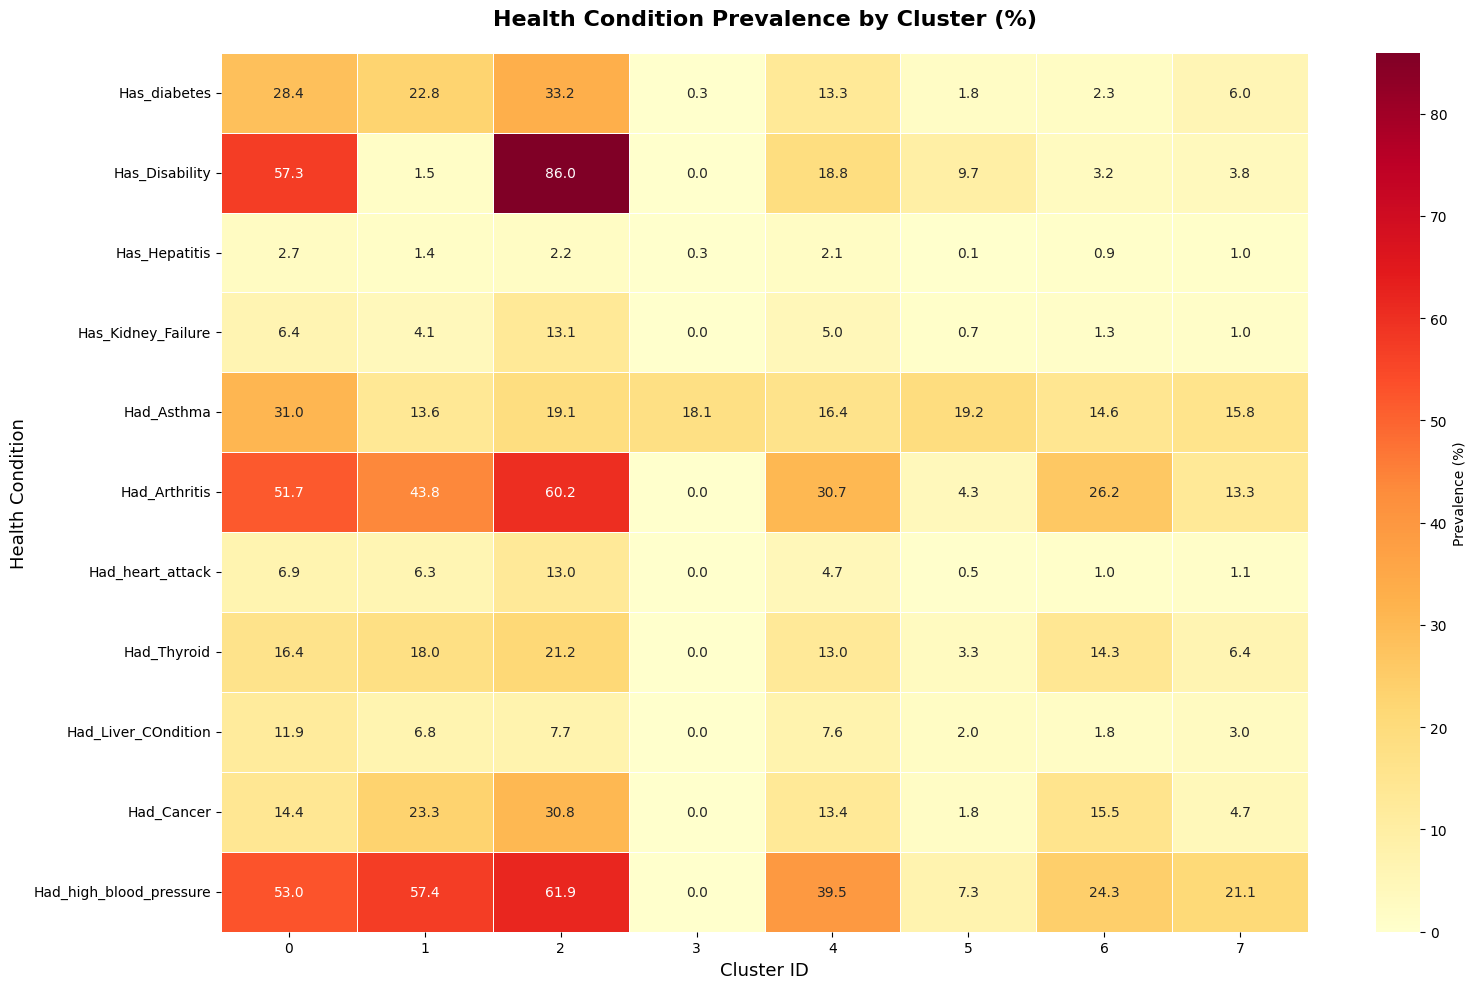

In [35]:
# ============================================================
# STEP 10: Create Visualization - Health Condition Heatmap
# ============================================================
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Health condition heatmap
plt.figure(figsize=(16, 10))
health_matrix = health_prevalence_df.set_index('Cluster').drop(columns=['Size'])
sns.heatmap(health_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Prevalence (%)'}, linewidths=0.5)
plt.title('Health Condition Prevalence by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Health Condition', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
print("✓ Saved: cluster_health_conditions_heatmap.png")
plt.show()

✓ Saved: cluster_age_distribution.png


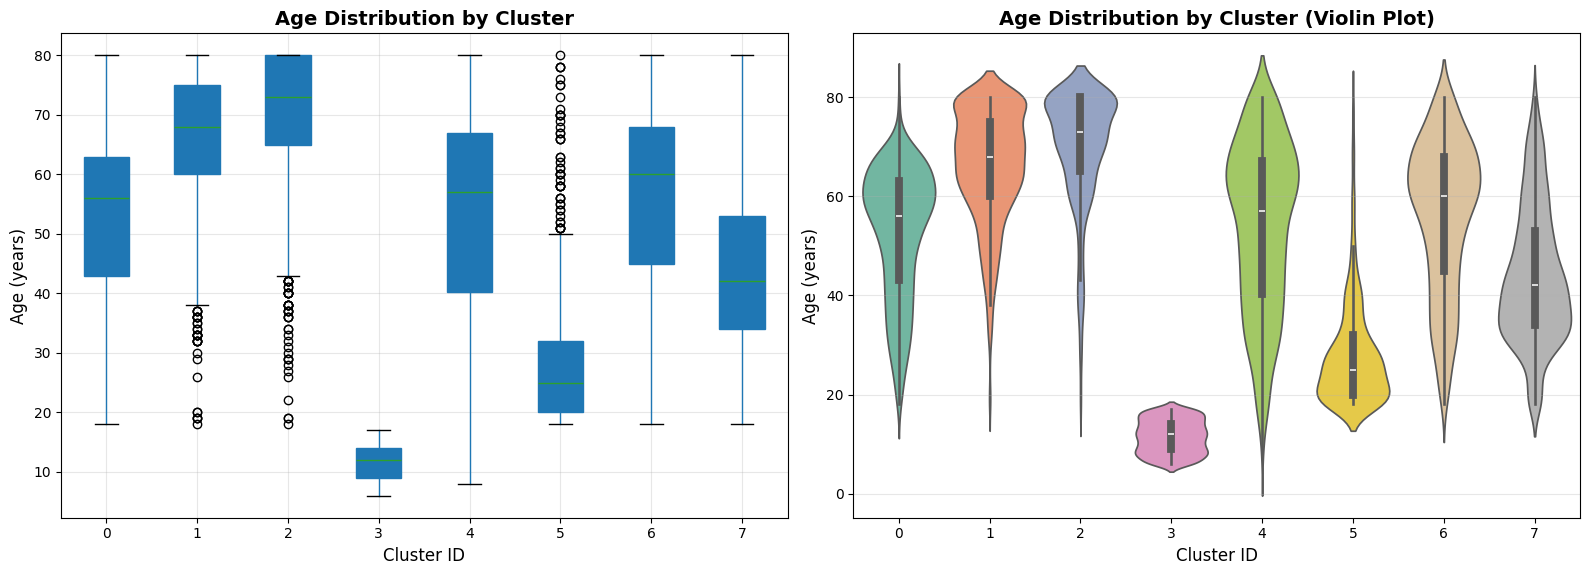

In [36]:
# ============================================================
# STEP 11: Age Distribution by Cluster
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df.boxplot(column='Age', by='pca_clusters', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='pca_clusters', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Cluster (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_age_distribution.png")
plt.show()

✓ Saved: cluster_clinical_measurements.png


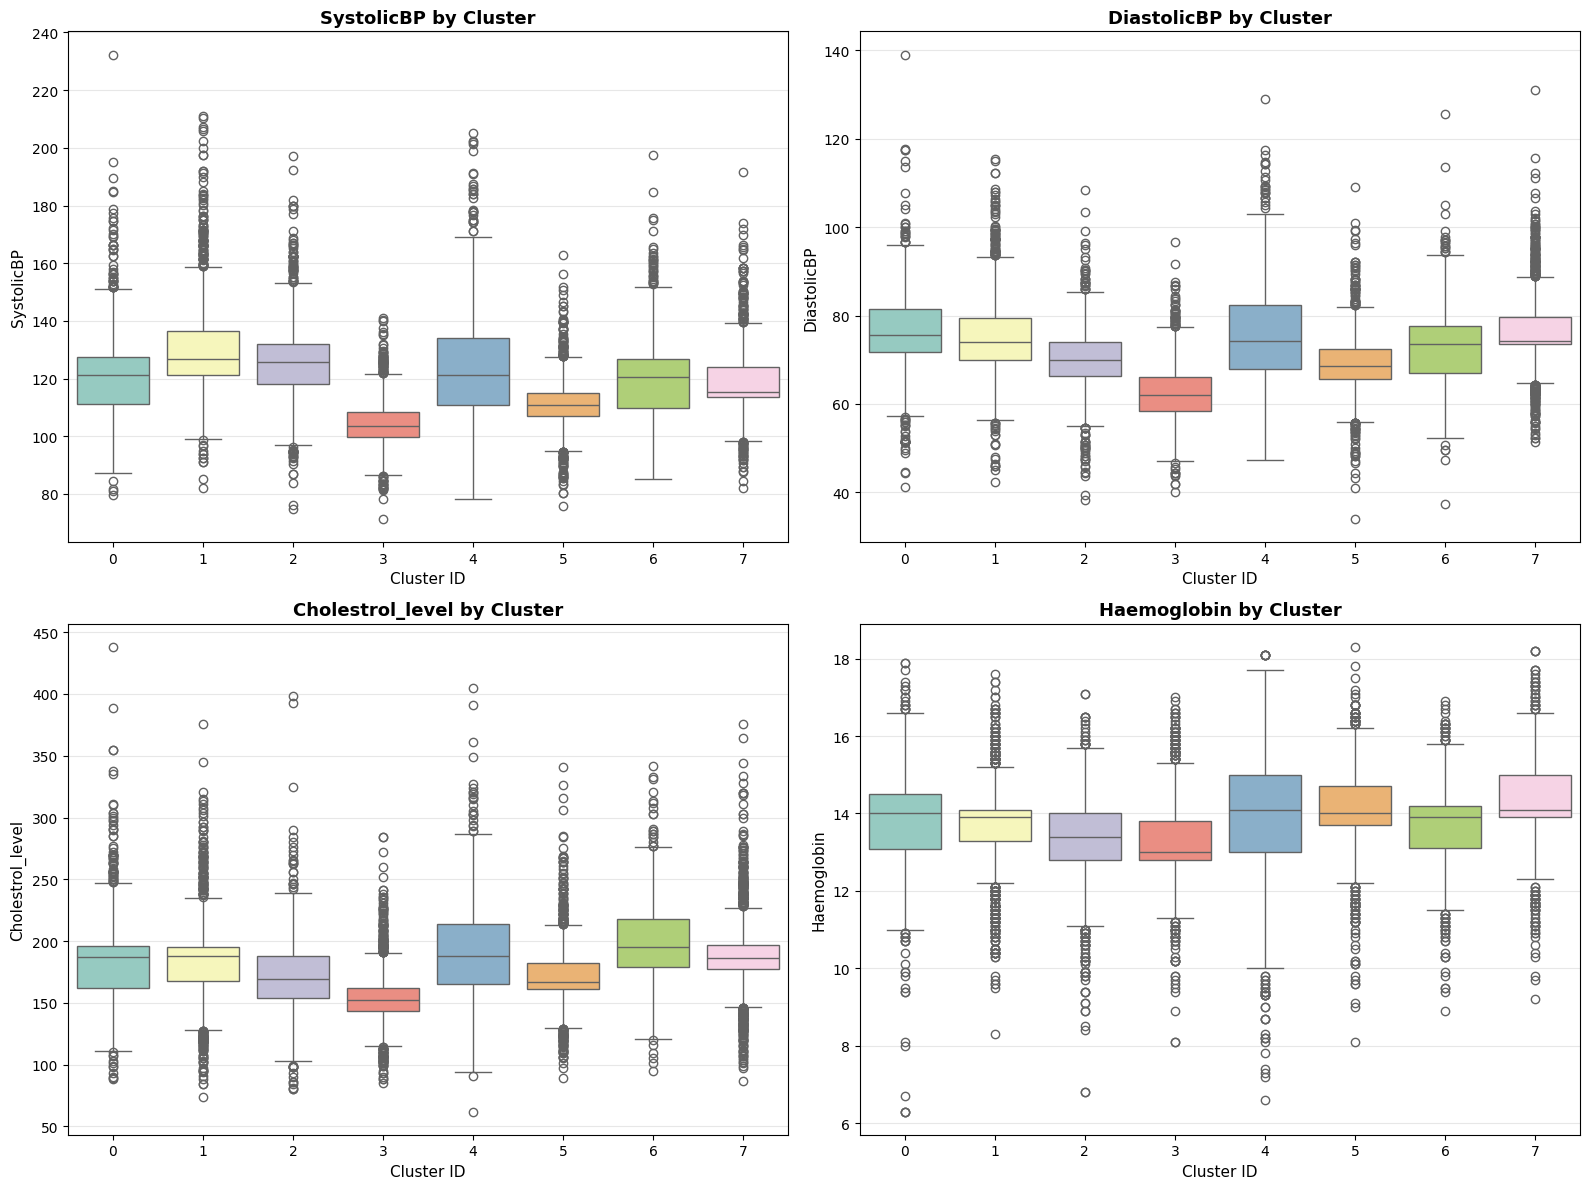

In [37]:
# ============================================================
# STEP 12: Clinical Measurements Comparison
# ============================================================
key_clinical = ['SystolicBP', 'DiastolicBP', 'Cholestrol_level', 'Haemoglobin']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, measure in enumerate(key_clinical):
    sns.boxplot(data=df, x='pca_clusters', y=measure, ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'{measure} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=11)
    axes[idx].set_ylabel(measure, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_clinical_measurements.png")
plt.show()

✓ Saved: cluster_gender_distribution.png


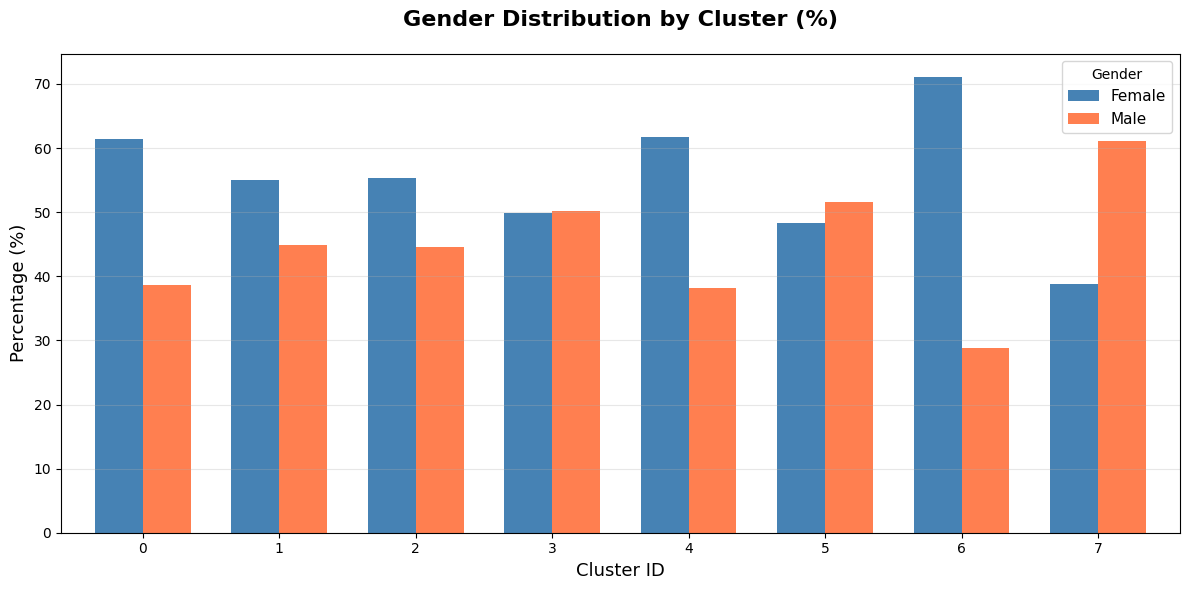

In [38]:
# ============================================================
# STEP 13: Gender Distribution by Cluster
# ============================================================
gender_cluster = pd.crosstab(df['pca_clusters'], df['Gender'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
gender_cluster.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'], width=0.7)
plt.title('Gender Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_gender_distribution.png")
plt.show()

✓ Saved: cluster_general_health_distribution.png


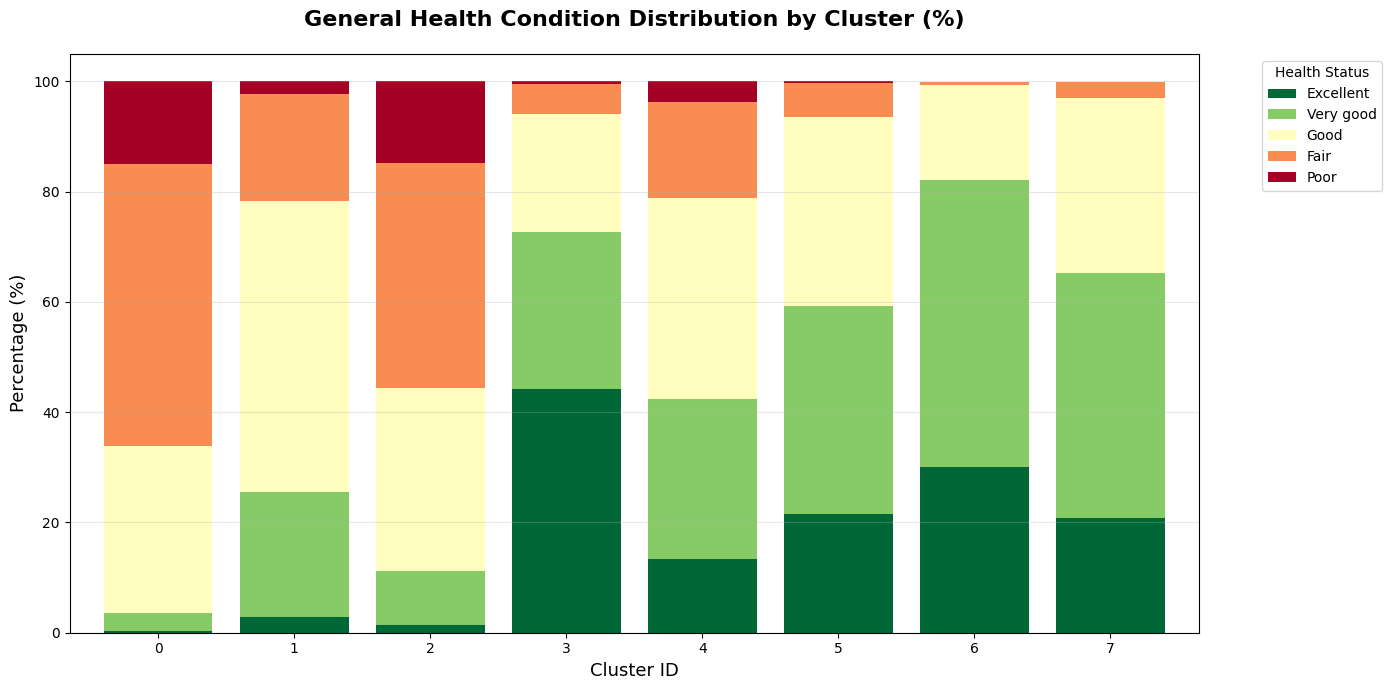

In [39]:
# ============================================================
# STEP 14: General Health Status by Cluster
# ============================================================
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
health_by_cluster = pd.crosstab(df['pca_clusters'], df['General_health_condition'], 
                                normalize='index') * 100

# Reorder columns
health_by_cluster = health_by_cluster.reindex(columns=[col for col in health_order if col in health_by_cluster.columns])

fig, ax = plt.subplots(figsize=(14, 7))
health_by_cluster.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='RdYlGn_r', width=0.8)
plt.title('General Health Condition Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_general_health_distribution.png")
plt.show()

✓ Saved: cluster_composite_scores.png


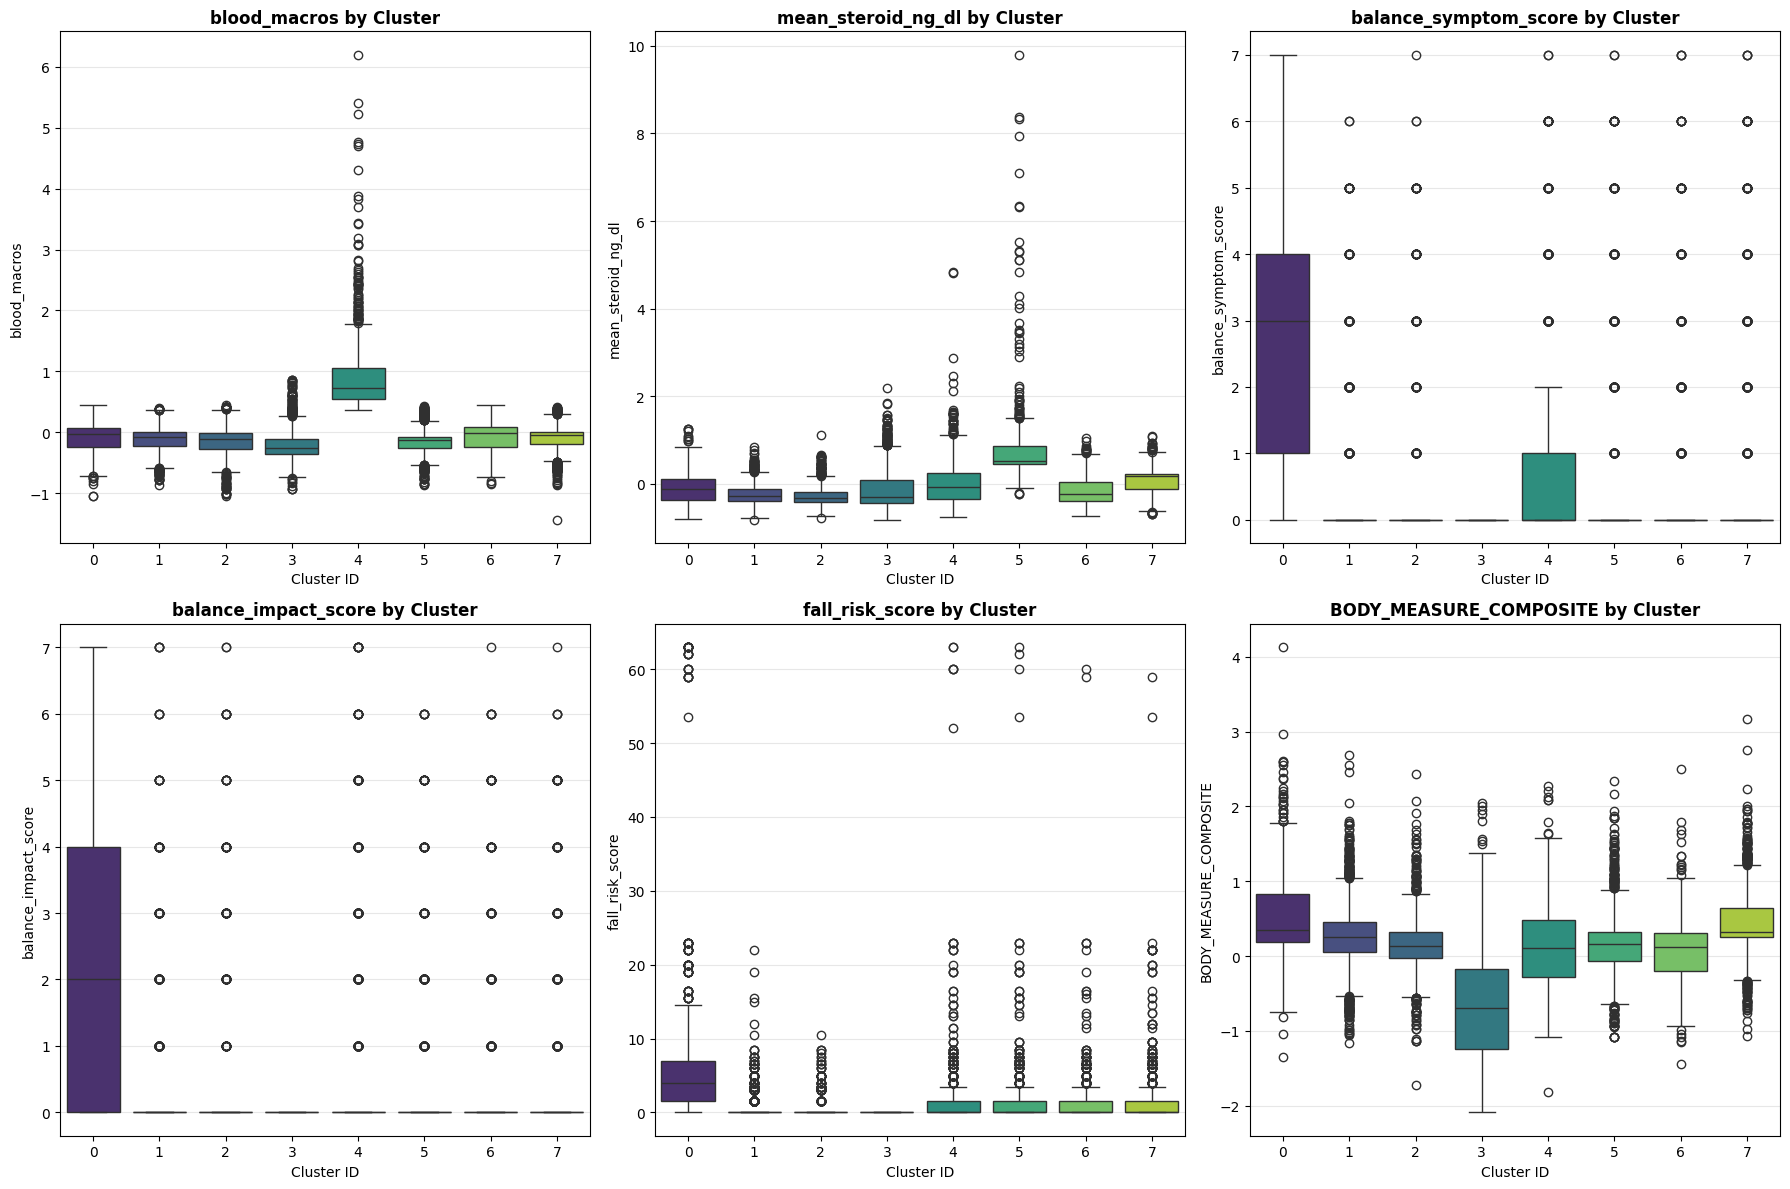

In [40]:
# ============================================================
# STEP 15: Composite Scores Comparison
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                     'balance_impact_score', 'fall_risk_score', 'BODY_MEASURE_COMPOSITE']

for idx, score in enumerate(numeric_composites):
    if score == 'fall_risk_score':
        # Filter outliers for visualization
        plot_data = df[df[score] < 100]
    else:
        plot_data = df
    
    sns.boxplot(data=plot_data, x='pca_clusters', y=score, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{score} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=10)
    axes[idx].set_ylabel(score, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_composite_scores.png")
plt.show()

In [41]:
# ============================================================
# STEP 17: Create Cluster Archetypes Summary
# ============================================================
print("\n" + "="*70)
print("CLUSTER ARCHETYPES - DETAILED SUMMARY")
print("="*70)

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'#'*70}")
    print(f"CLUSTER {cluster_id} ARCHETYPE")
    print(f"{'#'*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Demographics
    print(f"\n📊 DEMOGRAPHICS:")
    print(f"  Average Age: {cluster_data['Age'].mean():.0f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    print(f"  Gender: {male_pct:.0f}% Male, {100-male_pct:.0f}% Female")
    
    # Top health conditions
    print(f"\n🏥 TOP HEALTH CONDITIONS (>20% prevalence):")
    has_conditions = False
    for condition in health_conditions:
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prev = (yes_count / len(cluster_data)) * 100
        if prev > 20:
            print(f"  - {condition.replace('_', ' ')}: {prev:.1f}%")
            has_conditions = True
    if not has_conditions:
        print(f"  - No major health conditions >20% prevalence")
    
    # Clinical highlights
    print(f"\n💉 CLINICAL HIGHLIGHTS:")
    print(f"  Blood Pressure: {cluster_data['SystolicBP'].mean():.0f}/{cluster_data['DiastolicBP'].mean():.0f} mmHg")
    print(f"  Cholesterol: {cluster_data['Cholestrol_level'].mean():.0f} mg/dL")
    print(f"  Hemoglobin: {cluster_data['Haemoglobin'].mean():.1f} g/dL")
    
    # Socioeconomic
    income_clean = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_clean[(income_clean > 0) & (income_clean <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        if income_ratio < 1.3:
            ses_label = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_label = "Low SES"
        elif income_ratio < 3.0:
            ses_label = "Middle SES"
        else:
            ses_label = "High SES"
        print(f"\n💰 SOCIOECONOMIC STATUS:")
        print(f"  Income/Poverty Ratio: {income_ratio:.2f} ({ses_label})")
        insurance_pct = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum() / len(cluster_data) * 100
        print(f"  Health Insurance: {insurance_pct:.0f}%")
    
    # General health
    print(f"\n🌟 GENERAL HEALTH STATUS:")
    health_dist = cluster_data['General_health_condition'].value_counts().head(3)
    for status, count in health_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  - {status}: {pct:.0f}%")
    
    print(f"\n{'-'*70}")


CLUSTER ARCHETYPES - DETAILED SUMMARY

######################################################################
CLUSTER 0 ARCHETYPE
######################################################################
Size: 860 patients (9.1%)

📊 DEMOGRAPHICS:
  Average Age: 52 years
  Gender: 39% Male, 61% Female

🏥 TOP HEALTH CONDITIONS (>20% prevalence):
  - Has diabetes: 28.4%
  - Has Disability: 57.3%
  - Had Asthma: 31.0%
  - Had Arthritis: 51.7%
  - Had high blood pressure: 53.0%

💉 CLINICAL HIGHLIGHTS:
  Blood Pressure: 122/76 mmHg
  Cholesterol: 186 mg/dL
  Hemoglobin: 13.8 g/dL

💰 SOCIOECONOMIC STATUS:
  Income/Poverty Ratio: 1.89 (Low SES)
  Health Insurance: 87%

🌟 GENERAL HEALTH STATUS:
  - Fair: 51%
  - Good: 30%
  - Poor: 15%

----------------------------------------------------------------------

######################################################################
CLUSTER 1 ARCHETYPE
######################################################################
Size: 1,572 patients (16.6%)



## **Clinical Cluster Definitions - Disease-Focused Analysis**

### **Cluster 0: "Severe Functional Decline with Multi-Morbidity"**
Patients with catastrophic health deterioration showing extreme fall risk (7.24), severe disability (57%), and multiple chronic conditions including hypertension (53%), arthritis (52%), diabetes (28%), and asthma (31%). Low physical activity (2.4x/week), disrupted sleep patterns (7.5hrs), elevated WBC (7.76) indicating inflammation, low HDL (49) suggesting metabolic dysfunction, and obesity (BMI 0.51). Only 3% report good health with 66% in fair/poor status, requiring immediate comprehensive intervention for fall prevention and disability management.

### **Cluster 1: "Compensated Cardiovascular Disease with Cancer History"**
Patients with uncontrolled hypertension (57%, BP 131/75) despite treatment, significant arthritis (44%), cancer survivorship (23%), and diabetes (23%). Maintained low fall risk (0.68) and functional compensation despite disease burden. Normal inflammatory markers but elevated cardiovascular risk requiring aggressive blood pressure management and cancer surveillance protocols. Activity limited (2.7x/week) but 75% maintain fair-to-good health perception.

### **Cluster 2: "Terminal Multi-System Failure"**
Highest disability burden (86%) with critical multi-organ involvement: hypertension (62%), arthritis (60%), diabetes (33%), cancer (31%), kidney failure (13%), and heart attack history (13%). Minimal activity (2.2x/week), excessive sleep (8.6hrs indicating bedbound status), anemia (Hgb 13.29), lowest platelets (225). Despite lower fall risk (0.51), 91% have severe functional impairment requiring palliative care approach and end-of-life planning.

### **Cluster 3: "Healthy Baseline with Respiratory Sensitivity"**
Optimal health profile with only asthma prevalence (18%). Perfect balance scores (0.00), zero fall risk, lean body composition (-0.65), optimal blood pressure (104/62), and anti-inflammatory state (blood macros -0.21). Excellent health perception (73% excellent/very good) with normal sleep patterns (8.0hrs) representing ideal physiological baseline requiring only preventive care and asthma management.

### **Cluster 4: "Active with Paradoxical Inflammation"**
Moderate activity levels (3.6x/week) but highest systemic inflammation (blood macros 0.92) driving hypertension (40%), arthritis (31%), and diabetes (13%). Normal steroids but elevated inflammatory cascade suggests autoimmune or metabolic dysfunction requiring anti-inflammatory intervention. Moderate fall risk (1.81) with preserved function (52% mild difficulty) indicating compensation but risk for deterioration.

### **Cluster 5: "Young Adults on Chronic Steroids"**
Highest steroid levels (0.76) with asthma predominance (19%), minimal other chronic conditions. Optimal blood pressure (112/69), good activity (4.6x/week), normal body composition (0.17). Excellent health perception (59% excellent/very good) but requires monitoring for long-term steroid complications including bone density and metabolic effects.

### **Cluster 6: "Optimal Health Athletes"**
Superior cardiovascular profile with highest HDL (63.82), highest activity (5.4x/week), lowest WBC (6.08), optimal blood pressure (120/73). Minimal disease prevalence across all conditions (<25%), lean body composition (0.09), and 82% report excellent/very good health. Represents gold standard for healthy aging requiring only maintenance and prevention strategies.

### **Cluster 7: "Hidden Metabolic Syndrome"**
Critically low HDL (46.80), elevated body mass (0.43), insufficient sleep (7.4hrs) despite good activity (4.5x/week). Emerging hypertension (21%) with normal blood pressure currently (119/76) suggesting pre-hypertensive state. High health perception (65% excellent/very good) indicates lack of awareness about metabolic risk requiring aggressive lipid management and lifestyle modification.

Looking at your new visualizations and data, here's the refined analysis focusing purely on health conditions and clinical markers:

## **CLUSTER ANALYSIS - KMEANS ON PCA (90% Training Split)**

| Cluster | Profile Name | Key Characteristics |
|---------|-------------|-------------------|
| 0 | **Severe Disability with Extreme Fall Risk** | Fall risk 7.24 (highest), disability 57%, HTN 53%, arthritis 52%, diabetes 28%, low HDL 49, obesity 0.51 |
| 1 | **Elderly with Resistant HTN** | HTN 57% with BP 131/75, arthritis 44%, cancer 23%, diabetes 23%, low fall risk 0.68 |
| 2 | **Terminal Multi-Organ Failure** | Disability 86% (highest), HTN 62%, arthritis 60%, diabetes 33%, kidney failure 13%, heart attack 13% |
| 3 | **Healthy Pediatric** | Zero fall risk, asthma 18% only, BP 104/62, lean body -0.65, perfect balance scores |
| 4 | **Inflamed Multi-Morbid** | Blood macros 0.92 (highest), HTN 40%, arthritis 31%, diabetes 13%, moderate fall risk 1.81 |
| 5 | **Young on Respiratory Steroids** | Steroids 0.76 (highest), asthma 19%, BP 112/69, minimal chronic disease |
| 6 | **Optimal Health Athletes** | HDL 63.82 (best), activity 5.4x/wk, minimal disease (<25% all conditions), BP 120/73 |
| 7 | **Metabolic Risk Profile** | HDL 46.80 (lowest), BMI 0.43, HTN 21%, sleep 7.4hr, good activity but poor metabolism |

## **Key Clinical Insights from Visualizations:**

**Disease Burden Pattern (Heatmap):**
- Clusters 0, 1, 2 show heavy red zones (50-86% disability/HTN/arthritis)
- Clusters 3, 5 minimal disease (yellow/light zones)
- Clear separation between high-morbidity (0,1,2) and low-morbidity (3,5,6,7) groups

**Blood Pressure Analysis:**
- Cluster 1: Uncontrolled HTN despite 57% on treatment (BP 131/75)
- Cluster 3: Optimal pediatric BP (104/62)
- Clusters 5,6,7: Well-controlled despite some HTN prevalence

**Composite Score Patterns:**
- Balance/Fall risk concentrated in Cluster 0 (purple boxes in plots)
- Blood macros spike only in Cluster 4 (inflammation driver)
- Body composition worst in Clusters 0 and 7 (obesity risk)

**Health Status Distribution:**
- Clusters 0,2: 66% and 55% fair/poor (red/orange dominant)
- Clusters 3,6: 73% and 82% excellent/very good (green dominant)
- Clear gradient from sick (0,2) to healthy (3,6)

These clusters effectively stratify patients by disease severity and type, enabling targeted interventions based on clinical patterns rather than demographics.

## RecSys -- Need to redo

In [ ]:
# Load preprocessed new patient
processed_patient = pd.read_csv('Data/processed_new_patient.csv')

# Clean columns
if 'Unnamed: 0' in processed_patient.columns:
    processed_patient = processed_patient.drop(columns=['Unnamed: 0'])
if 'Cluster' in processed_patient.columns:
    processed_patient = processed_patient.drop(columns=['Cluster'])

print(f"\nProcessed patient shape: {processed_patient.shape}")

# Load PCA model
pca_model = joblib.load('Data/pca_model.pkl')
patient_pca = pca_model.transform(processed_patient)

# Convert to DataFrame
n_components = patient_pca.shape[1]
pca_columns = [f'PC{i+1}' for i in range(n_components)]
patient_pca_df = pd.DataFrame(patient_pca, columns=pca_columns)

print(f"After PCA: {processed_patient.shape[1]} features → {patient_pca_df.shape[1]} components")

cluster_assignment = kmeans_clean.predict(patient_pca_df)

print(f"\n{'='*60}")
print(f"RESULTS")
print(f"{'='*60}")
print(f"New patient assigned to: Cluster {cluster_assignment[0]}")

# Get distances
distances = kmeans_clean.transform(patient_pca_df)

print(f"\nDistances to cluster centers:")
for i in range(optimal_k):
    marker = " ← ASSIGNED" if i == cluster_assignment[0] else ""
    print(f"  Cluster {i}: {distances[0, i]:.4f}{marker}")


Processed patient shape: (1, 55)
After PCA: 55 features → 15 components


In [43]:
# ============================================================
# ASSIGN NEW PATIENT TO HIERARCHICAL CLUSTER
# ============================================================

# Assuming you already have:
# - patient_pca_df: your PCA-transformed new patient data
# - kmeans_final: your main 4-cluster KMeans model (from Step 5)
# - kmeans_c2: subcluster model for original cluster 2
# - kmeans_c3: subcluster model for original cluster 3
# - k_split_c2 = 3 (number of subclusters for cluster 2)
# - k_split_c3 = 3 (number of subclusters for cluster 3)

print("="*70)
print("CLUSTER ASSIGNMENT FOR NEW PATIENT")
print("="*70)

# Step 1: Get main cluster assignment using the original kmeans_final model
main_cluster = kmeans_final.predict(patient_pca_df)[0]
print(f"\nInitial cluster assignment (4-cluster model): {main_cluster}")

# Get distances to all 4 original cluster centers
main_distances = kmeans_final.transform(patient_pca_df)[0]
print(f"\nDistances to original 4 cluster centers:")
for i in range(4):  # optimal_k = 4
    marker = " ← ASSIGNED" if i == main_cluster else ""
    print(f"  Cluster {i}: {main_distances[i]:.4f}{marker}")


# Step 2: Apply hierarchical subclustering based on main cluster
print("\n" + "-"*70)
print("APPLYING SUBCLUSTERING")
print("-"*70)

final_cluster = None
subcluster_id = None

if main_cluster == 0:
    # Cluster 0 stays as is
    final_cluster = 0
    print(f"Cluster 0: No subclustering applied")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 1:
    # Cluster 1 stays as is
    final_cluster = 1
    print(f"Cluster 1: No subclustering applied")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 2:
    # Original Cluster 2 gets split into 3 subclusters (mapped to 2, 3, 4)
    print(f"Cluster 2 detected: Applying subclustering (k={k_split_c2})...")
    
    # Get subcluster assignment within cluster 2
    subcluster_id = kmeans_c2.predict(patient_pca_df)[0]
    
    # Map subcluster to final cluster ID
    # Subcluster 0 → Final cluster 2
    # Subcluster 1 → Final cluster 3
    # Subcluster 2 → Final cluster 4
    final_cluster = 2 + subcluster_id
    
    # Get distances to subcluster centers
    sub_distances = kmeans_c2.transform(patient_pca_df)[0]
    
    print(f"\nSubcluster distances within original Cluster 2:")
    for i in range(k_split_c2):
        marker = " ← ASSIGNED" if i == subcluster_id else ""
        mapped_cluster = 2 + i
        print(f"  Subcluster {i} → Final Cluster {mapped_cluster}: {sub_distances[i]:.4f}{marker}")
    
    
    print(f"\nSubcluster assignment: {subcluster_id}")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 3:
    # Original Cluster 3 gets split into 3 subclusters (mapped to 5, 6, 7)
    print(f"Cluster 3 detected: Applying subclustering (k={k_split_c3})...")
    
    # Get subcluster assignment within cluster 3
    subcluster_id = kmeans_c3.predict(patient_pca_df)[0]
    
    # Map subcluster to final cluster ID
    # Subcluster 0 → Final cluster 5
    # Subcluster 1 → Final cluster 6
    # Subcluster 2 → Final cluster 7
    final_cluster = 2 + k_split_c2 + subcluster_id  # 2 + 3 + subcluster_id = 5 + subcluster_id
    
    # Get distances to subcluster centers
    sub_distances = kmeans_c3.transform(patient_pca_df)[0]
    
    print(f"\nSubcluster distances within original Cluster 3:")
    for i in range(k_split_c3):
        marker = " ← ASSIGNED" if i == subcluster_id else ""
        mapped_cluster = 2 + k_split_c2 + i
        print(f"  Subcluster {i} → Final Cluster {mapped_cluster}: {sub_distances[i]:.4f}{marker}")
    
    
    print(f"\nSubcluster assignment: {subcluster_id}")
    print(f"Final cluster assignment: {final_cluster}")

# Step 3: Final Summary
print("\n" + "="*70)
print("FINAL ASSIGNMENT SUMMARY")
print("="*70)

# Mapping description
cluster_mapping = {
    0: "Cluster 0 (Original, 1,169 patients, 11.1%)",
    1: "Cluster 1 (Original, 1,700 patients, 16.2%)",
    2: "Cluster 2.0 (From original Cluster 2)",
    3: "Cluster 2.1 (From original Cluster 2)",
    4: "Cluster 2.2 (From original Cluster 2)",
    5: "Cluster 3.0 (From original Cluster 3)",
    6: "Cluster 3.1 (From original Cluster 3)",
    7: "Cluster 3.2 (From original Cluster 3)"
}

print(f"Original 4-cluster assignment: Cluster {main_cluster}")
if subcluster_id is not None:
    print(f"Subcluster within original cluster: {subcluster_id}")
print(f"Final 8-cluster assignment: Cluster {final_cluster}")
print(f"Description: {cluster_mapping[final_cluster]}")

CLUSTER ASSIGNMENT FOR NEW PATIENT

Initial cluster assignment (4-cluster model): 3

Distances to original 4 cluster centers:
  Cluster 0: 5.2207
  Cluster 1: 7.1324
  Cluster 2: 3.3176
  Cluster 3: 2.0964 ← ASSIGNED

----------------------------------------------------------------------
APPLYING SUBCLUSTERING
----------------------------------------------------------------------
Cluster 3 detected: Applying subclustering (k=3)...

Subcluster distances within original Cluster 3:
  Subcluster 0 → Final Cluster 5: 2.3191 ← ASSIGNED
  Subcluster 1 → Final Cluster 6: 2.5645
  Subcluster 2 → Final Cluster 7: 2.9441

Subcluster assignment: 0
Final cluster assignment: 5

FINAL ASSIGNMENT SUMMARY
Original 4-cluster assignment: Cluster 3
Subcluster within original cluster: 0
Final 8-cluster assignment: Cluster 5
Description: Cluster 3.0 (From original Cluster 3)
